In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import ugradio as ug 


In [2]:
import numpy as np

def _compute_dft(in_x,in_y,out_x,inverse=False):
    if not inverse:
        in_y = np.fft.fftshift(in_y) 
        j = -1j
    else:
        in_y = np.array([i*(1.0/len(in_x)) for i in in_y])
        j = 1j

    N = len(in_x)
    out_y = np.zeros(len(out_x),dtype=np.complex128)
    for k,f in enumerate(out_x):
        out_y[k] = np.sum(in_y*np.exp(2*j*np.pi*f*in_x))

    return out_y
            
def dft(xt,t=[],f=[],vsamp=12.5e6):
    """
    Input 
    -----
    xt    : complex array, input time domain signal
    t     : (opt.) real array, input sample times. 
    f     : (opt.) real array, output sample frequencies
    vsamp : (opt.) float, sampling frequency
            default: 1
    Output
    ------
    Fx    : The discrete fourier transform of the input array

    """
    N = len(xt)
    if (len(t)):
        assert(len(t) == N), "Samples and sample times do not match!"
    else:
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)

    if not (len(f)):
        vsamp = N/float(np.ceil(t.max() - t.min()))
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)
    
    Fx = _compute_dft(t,xt,f)

    return f,Fx

def idft(Fx,f=[],t=[],vsamp=12.5e6):
    """
    Input
    -----
    Fx    : complex array, input frequency domain signal
    f     : (opt.) real array, input sample frequencies
    t     : (opt.) real array, output sample times
    
    Output
    ------
    xt: The time domain signal of the input array

    """
    N = len(Fx)
    if (len(f)):
        assert(len(f) == N), "Samples and sample frequencies do not match!"
    else:
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)

    if not (len(t)):
        T = N/float(np.ceil(f.max()) - f.min())
        t = np.linspace(-T/2.0,T/2.0,num=N,endpoint=False)
    
    xt = _compute_dft(f,Fx,t,inverse=True)

    return t,xt



In [3]:
ARR = []
for i in range(1,10):
    name = "lab1" + '_%s' % i + '0p_1' + '.npy' 
    ARR.append(np.load(name))
   


In [4]:
##NYQUIST CRITERION 



In [47]:
def digital_sampling_normalize(N):
    v_samp=12.5
    t = np.linspace(0,N,N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        plt.plot(t,ARR[i-1][50:N+50]/(2**13),'b.-')
        plt.xlabel("Time  ($\mu$s)", fontsize= 20)
        plt.ylabel("Voltage (V)", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
        plt.grid(True)
        plt.show()

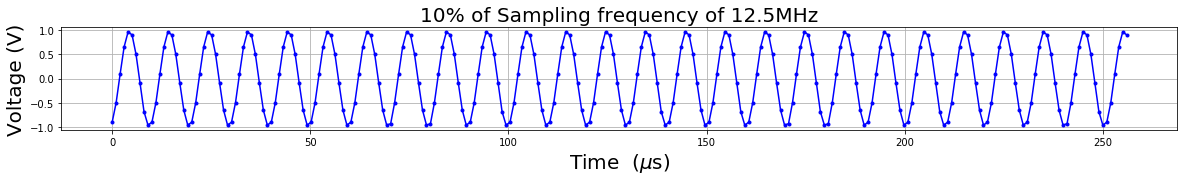

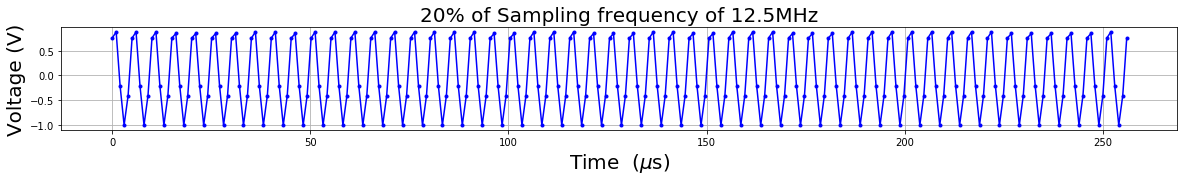

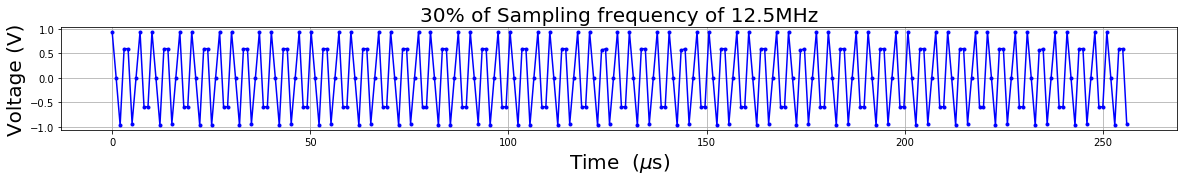

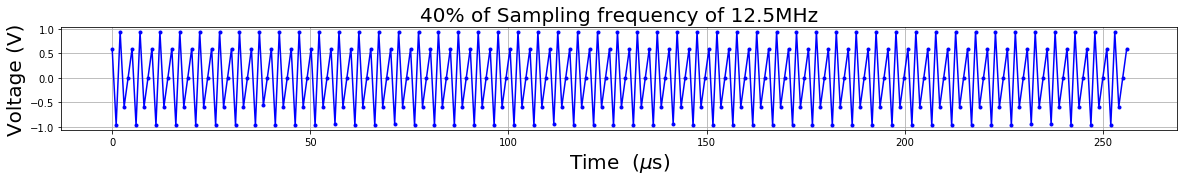

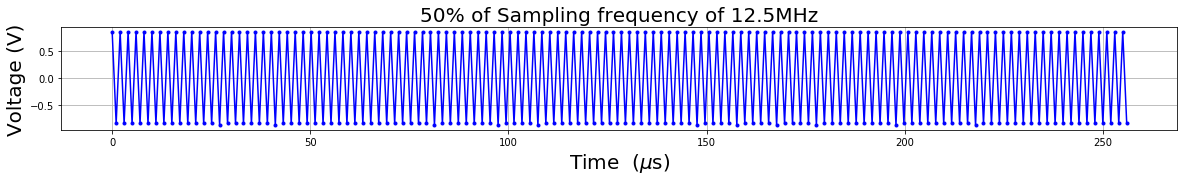

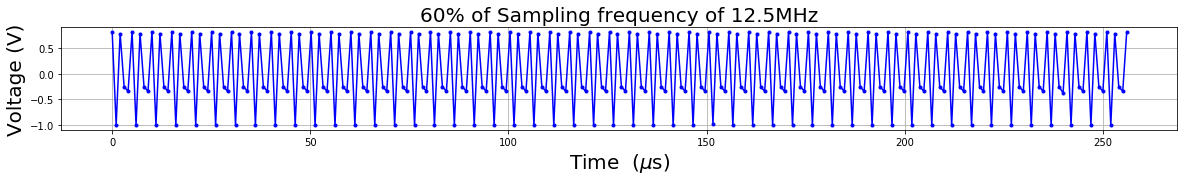

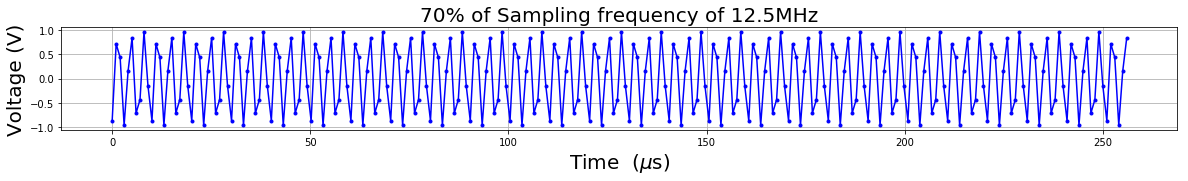

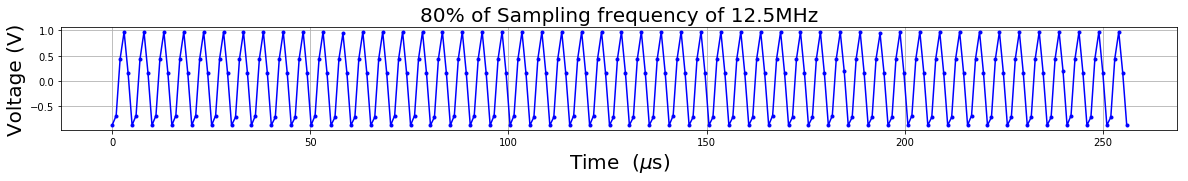

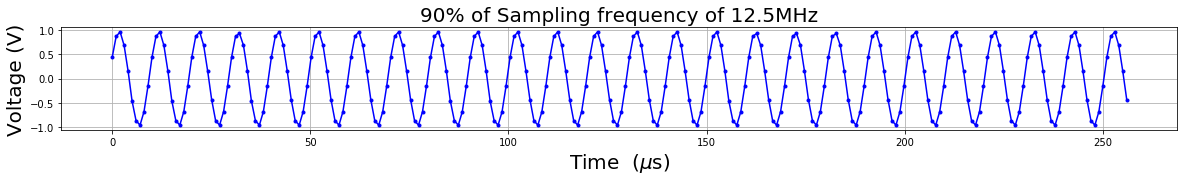

In [48]:
digital_sampling_normalize(2**8)   

In [7]:
##VOLTAGE SPECTRUM 

In [38]:
def voltage_spectrum( N):
   
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    REAL = []
    IMAG = []
    for i in range(1,10):
        F = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        real = []
        imag = []
        REAL.append(real)
        IMAG.append(imag)
        for num in F[1]:
            real.append(num.real)
            imag.append(num.imag)
    return REAL, IMAG
        



In [51]:
def get_VS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
  
        plt.figure(figsize=(20,20))
        yee = 910 + i
        plt.subplot(yee)
        plt.plot(f/1e6,voltage_spectrum(N)[0][i-1],'r.-')
        plt.plot(f/1e6,voltage_spectrum(N)[1][i-1],'b.-')
        plt.xlabel("Frequency (MHz)",fontsize=20)
        plt.ylabel("(V$\mu$s)",fontsize = 20)
        plt.title(str(i) + "0% of Sampling frequency of 12.5 MHz",fontsize=20)
        plt.legend(['real voltage spectrum','imaginary voltage spectrum'],loc='upper right',fontsize=8)
        plt.show()
    

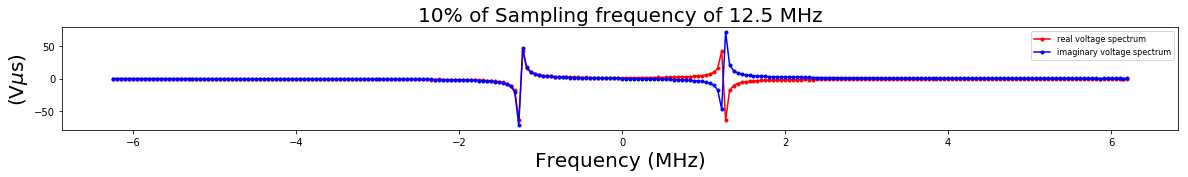

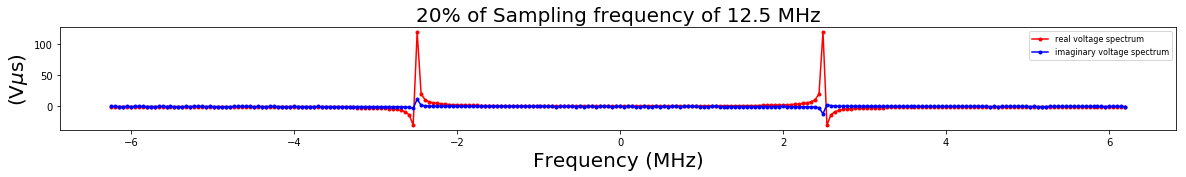

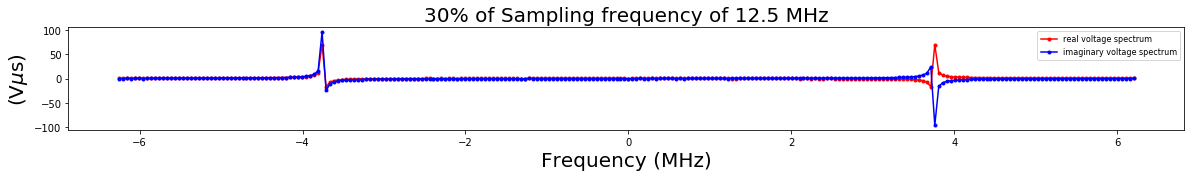

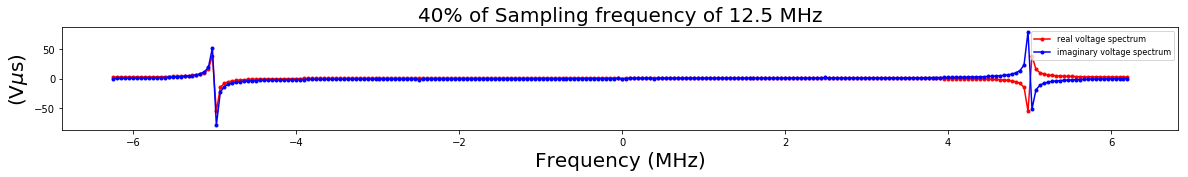

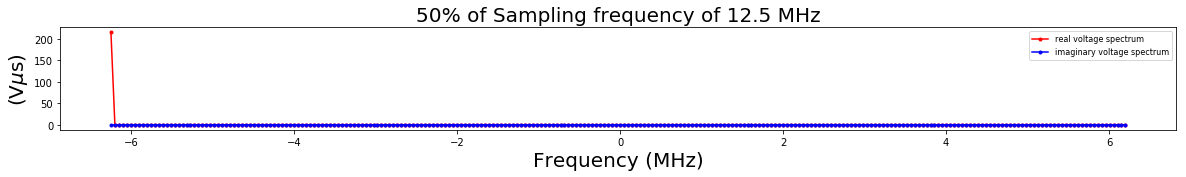

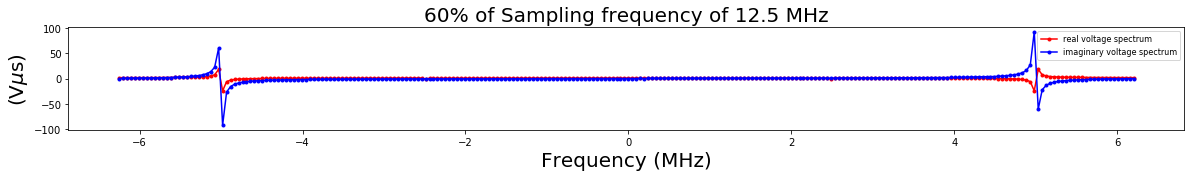

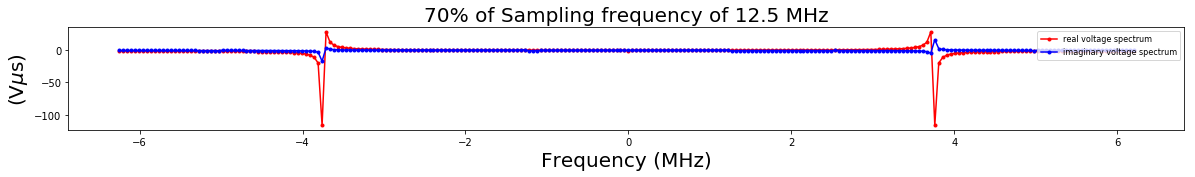

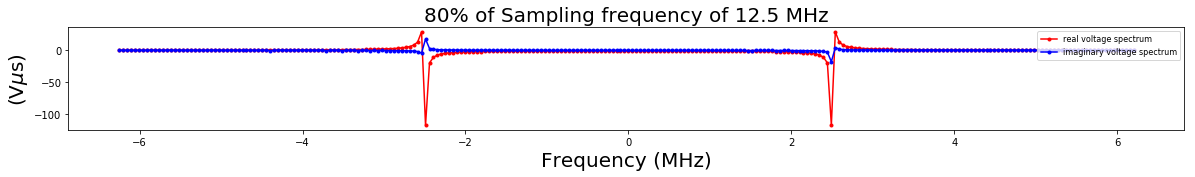

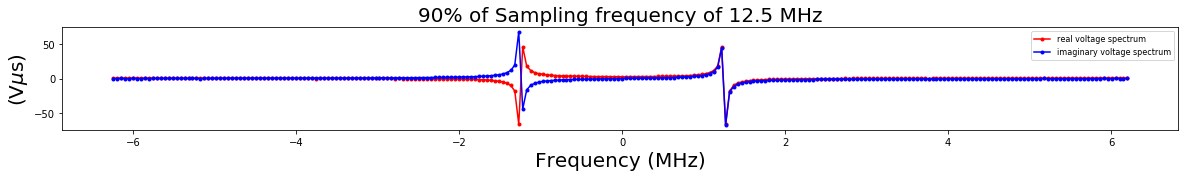

In [52]:
get_VS_plots(2**8)

In [53]:
##POWER SPECTRUM 

In [54]:
def power_spectra(N):
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,10):
        pf = []
        EF = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    return PF


In [81]:
def get_PS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        plt.plot(f/1e6,power_spectra(N)[i-1],'b.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("(V$\mu$s)$^2$", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
        plt.show()
    

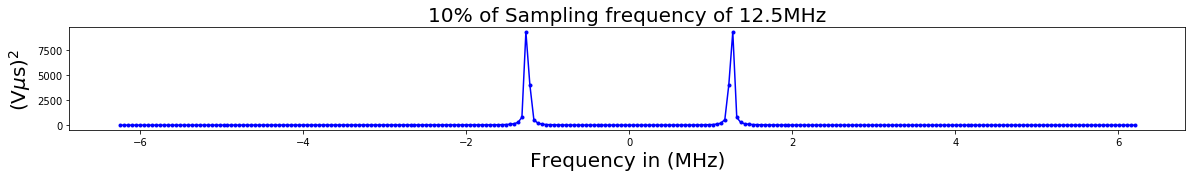

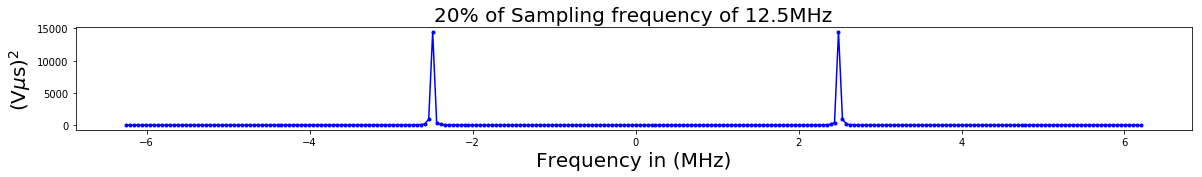

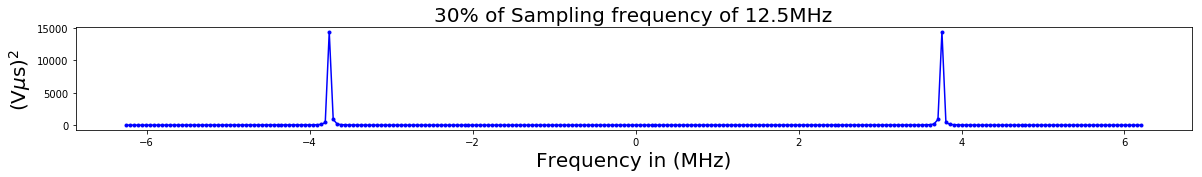

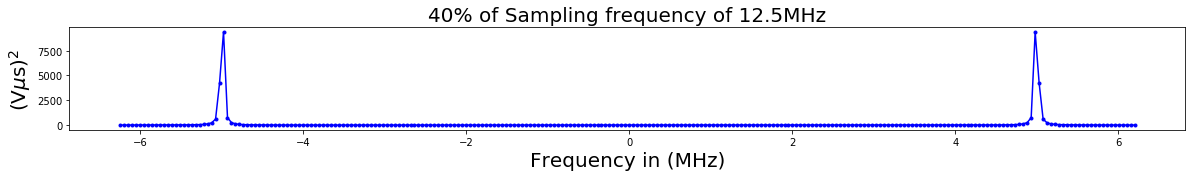

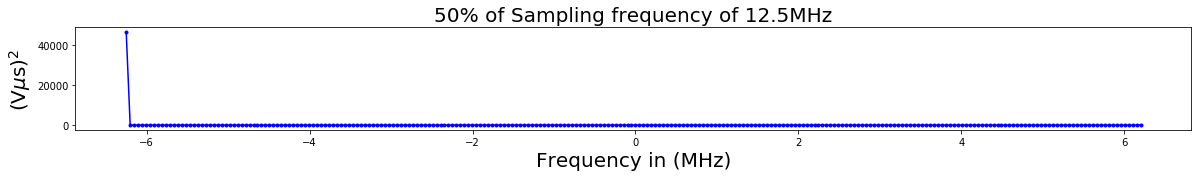

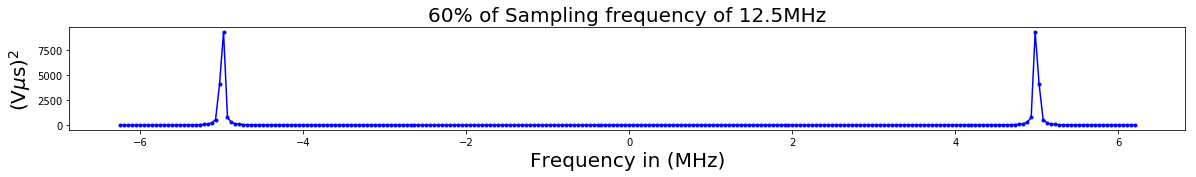

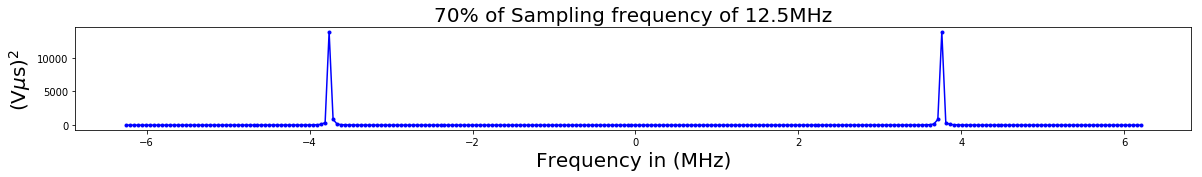

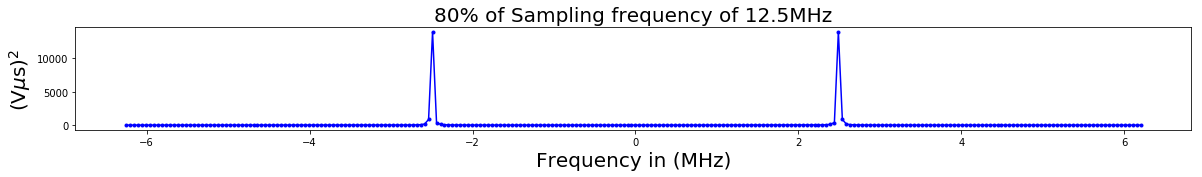

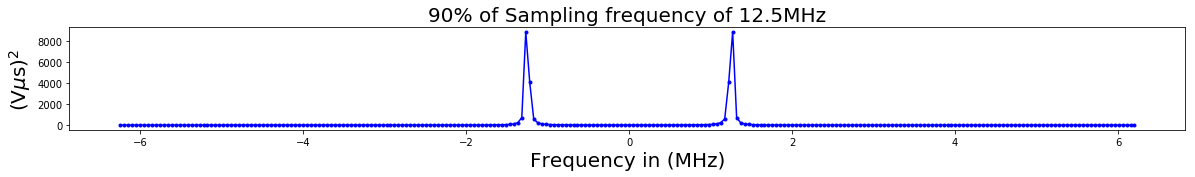

In [82]:
get_PS_plots(2**8)

In [47]:
##POWER LEAKAGE

In [85]:
def get_PS_plots_leaks(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
        plt.figure(figsize=(20,20))
        lit = 910 + i
        plt.subplot(lit)
        plt.plot(f/1e6,power_spectra(N)[i-1],'r.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("(V$\mu$s)$^2$", fontsize = 20)
        plt.ylim(0,20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
        plt.show()
    

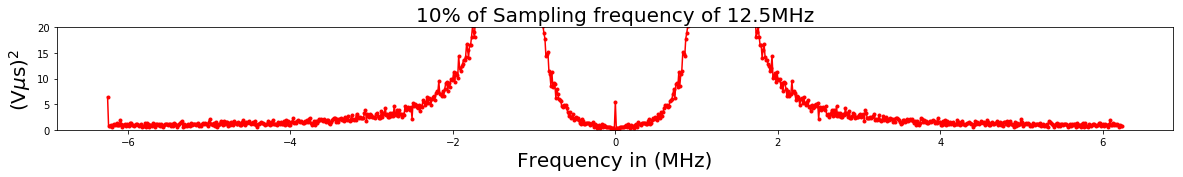

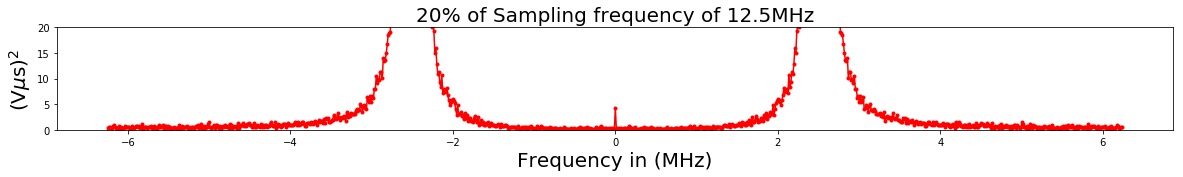

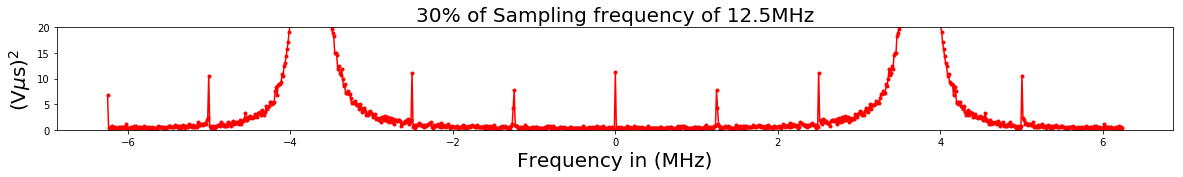

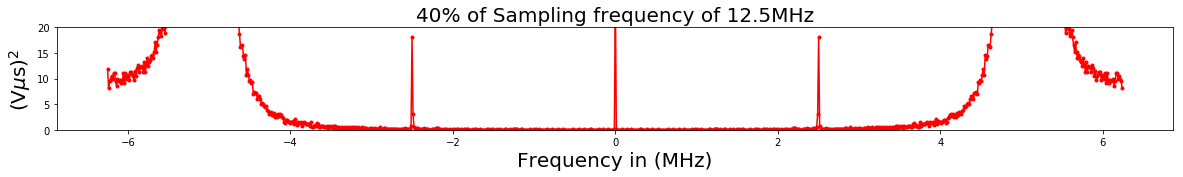

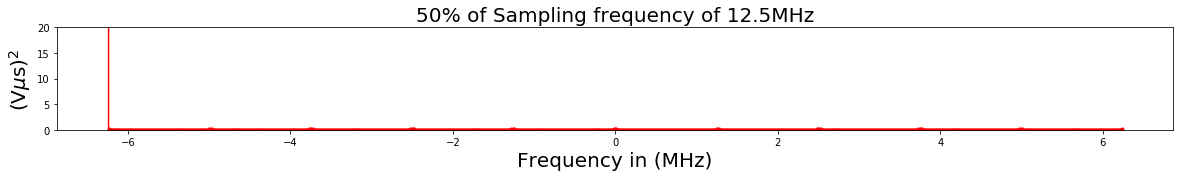

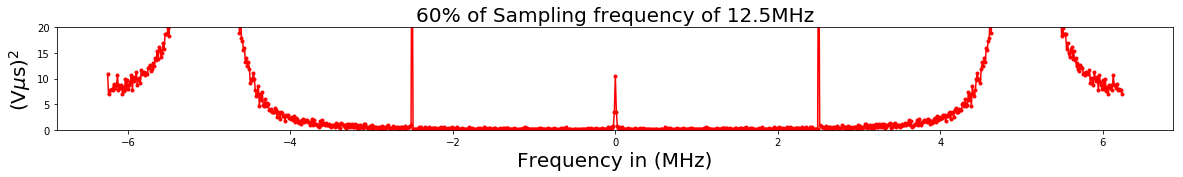

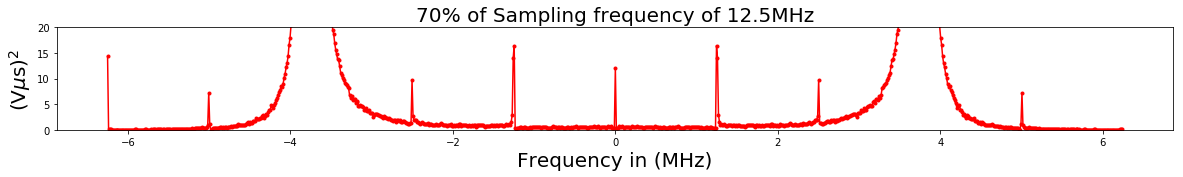

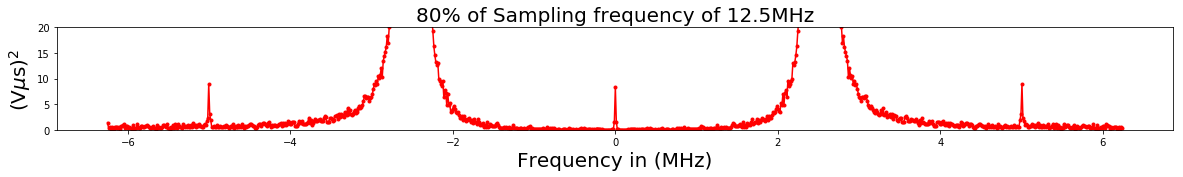

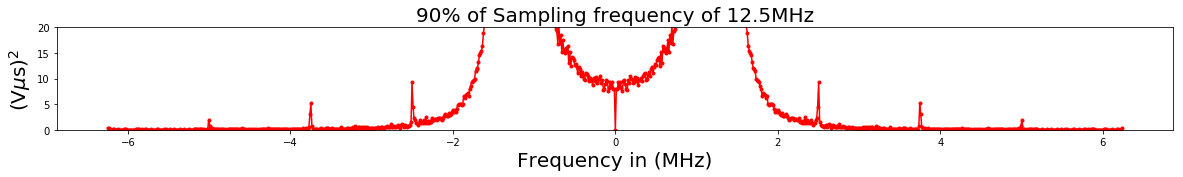

In [86]:
get_PS_plots_leaks(2**10)

In [18]:
##FREQUENCY RESOLUTION 

In [109]:
data = np.load('3.5data.npy')
data = data/2**15
N = 2**8


In [110]:
def power_spectra_resolution(N):
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
  
    EF = dft(data[0:N],t,f,vsamp=12.5e6)
    for comp in EF[1]:
        PF.append(np.abs(comp)**2)
    return PF

In [111]:
def get_PS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(20,20))
    plt.subplot(411)
    plt.plot(f/1e6,power_spectra_resolution(N),'r.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 20)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 20)
    plt.show()
    

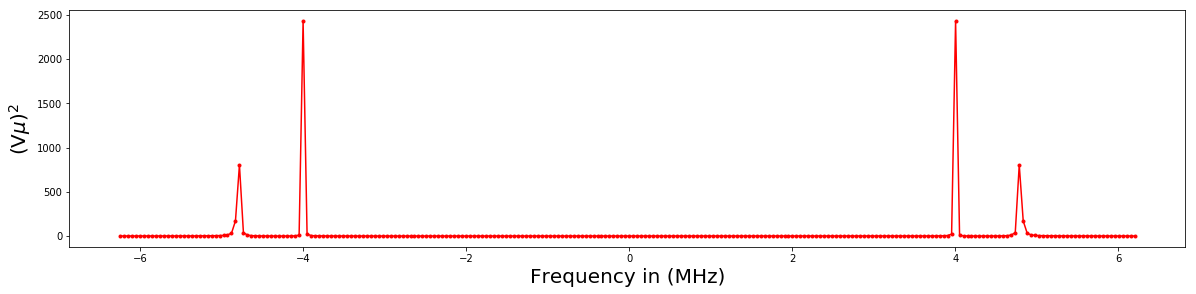

In [112]:
get_PS_plots(N)

###NYQUIST WINDOW 

In [114]:
def voltage_spectrum(N,n):
    
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-n*v_samp/2,(1-2/N)*(n*v_samp/2),N)  #output sample frequency domain 
    REAL = []
    IMAG = []
    for i in range(1,10):
        F = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        real = []
        imag = []
        REAL.append(real)
        IMAG.append(imag)
        for num in F[1]:
            real.append(num.real)
            imag.append(num.imag)
    return REAL, IMAG
        
def get_VS_plots(N,n):
    
    for i in range(1,n):
        v_samp = 12.5e6
        f = np.linspace(-i*v_samp/2,(1-2/N)*(i*v_samp/2),N)
        lit = 911
  
        plt.figure(figsize=(20,20))
        plt.subplot(lit)
        plt.plot(f/1e6,voltage_spectrum(N,i)[0][4],'r.-')
        plt.plot(f/1e6,voltage_spectrum(N,i)[1][4],'b.-')
        plt.xlabel("Frequency in (MHz)",fontsize=20)
        plt.ylabel("(V$\mu$s)$^2$",fontsize = 20)
        plt.title("50% of Sampling frequency of 12.5 MHz",fontsize=20)
        plt.legend(['real voltage spectrum','imaginary voltage spectrum'],loc='upper right',fontsize=8)
        plt.show()



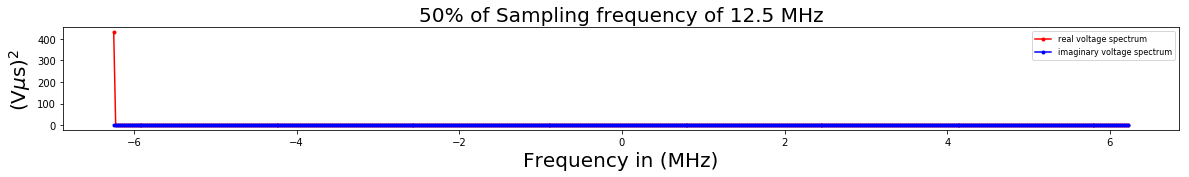

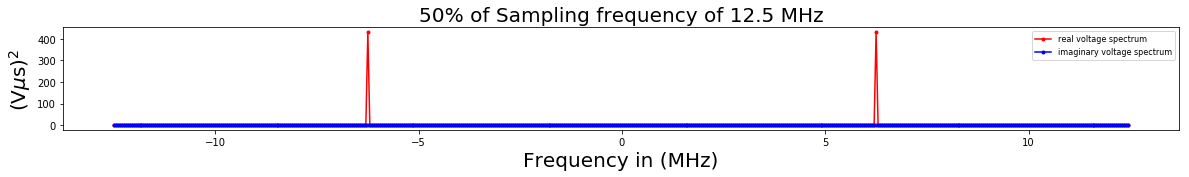

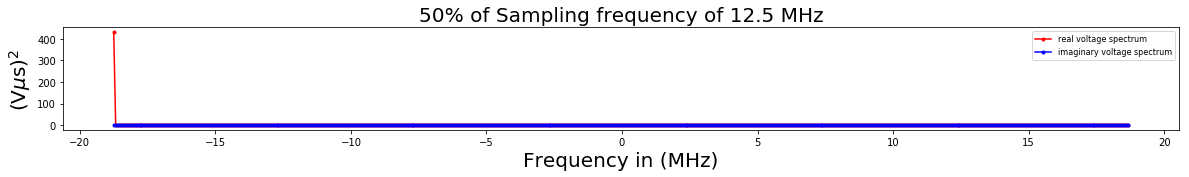

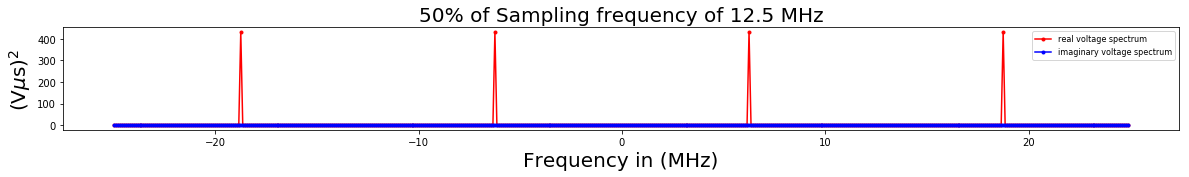

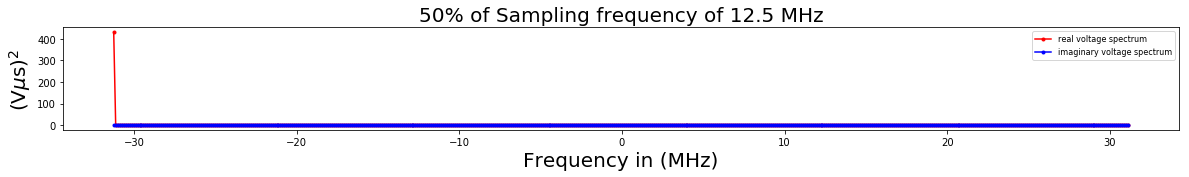

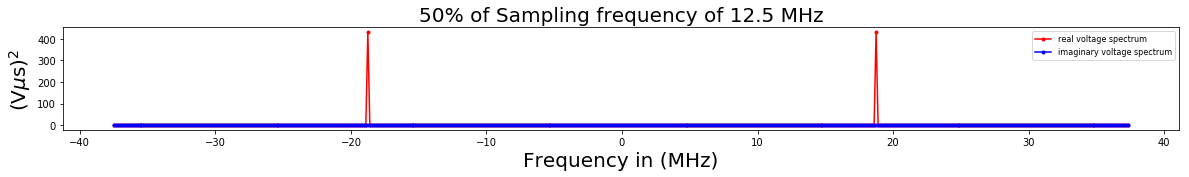

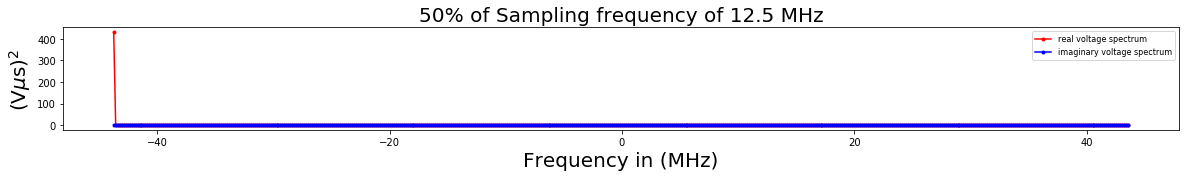

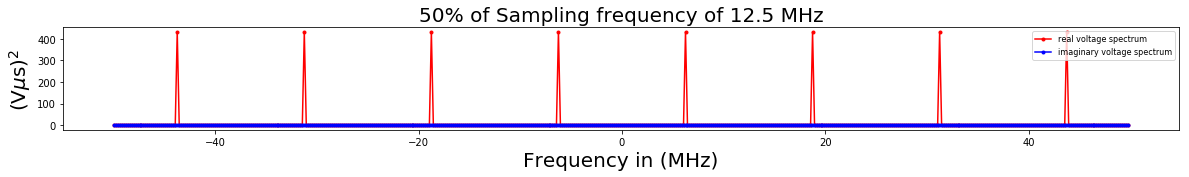

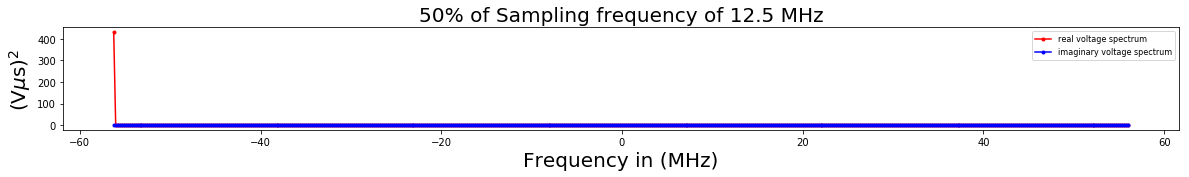

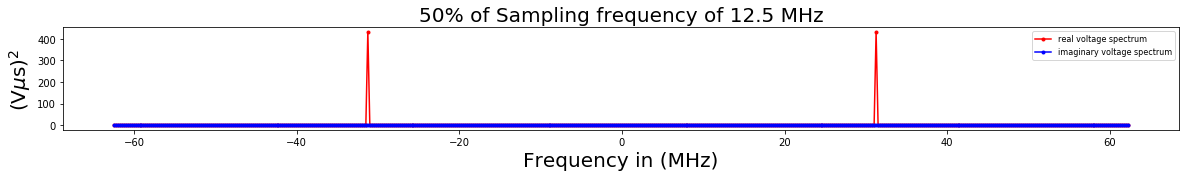

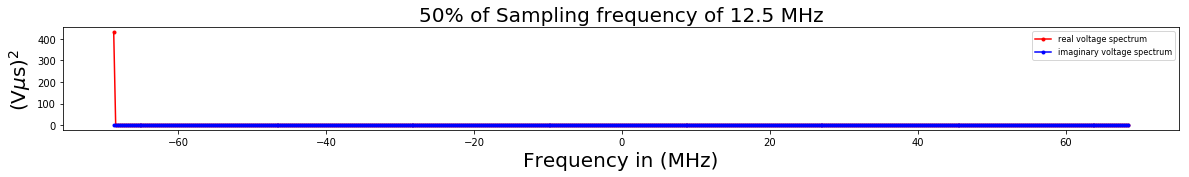

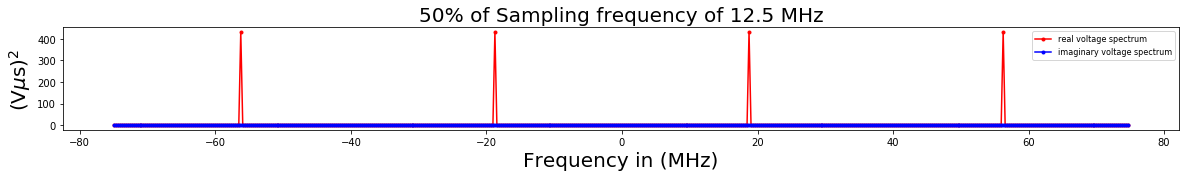

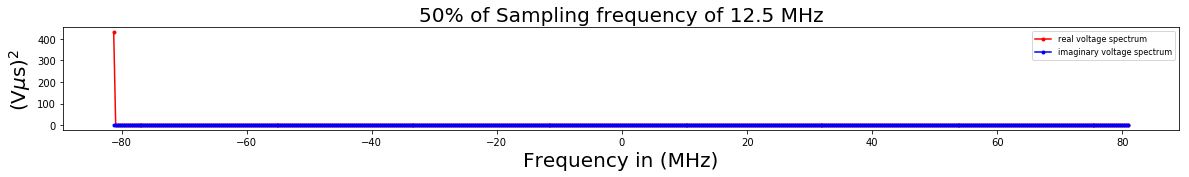

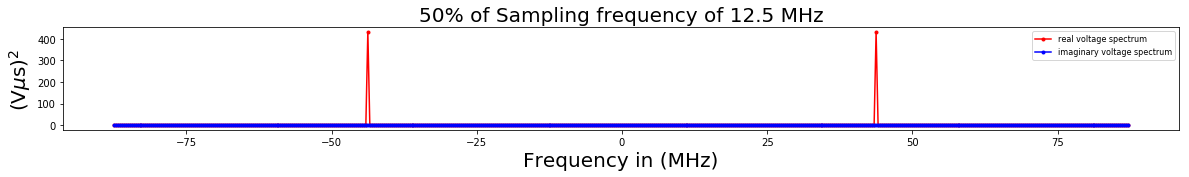

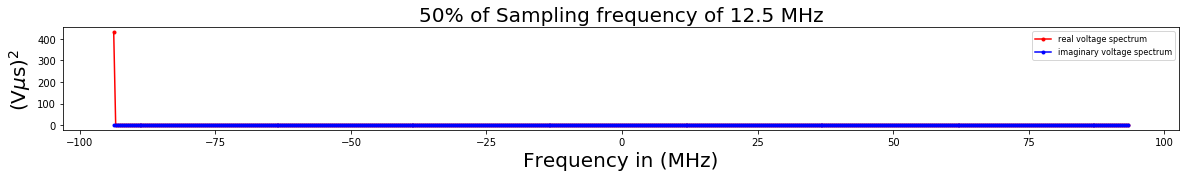

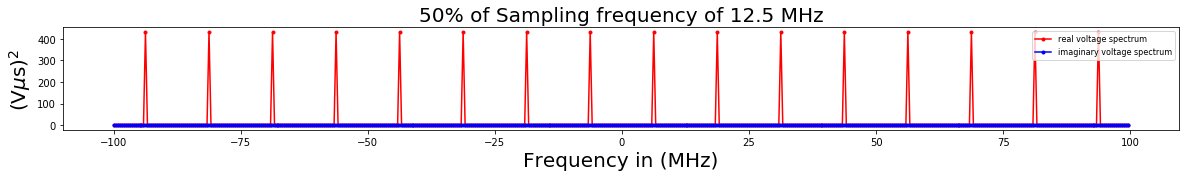

In [115]:
get_VS_plots(2**9,17)

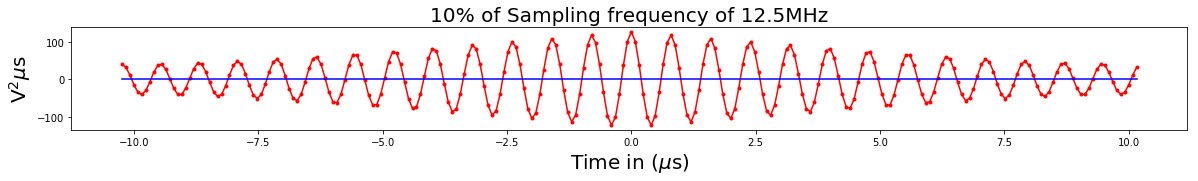

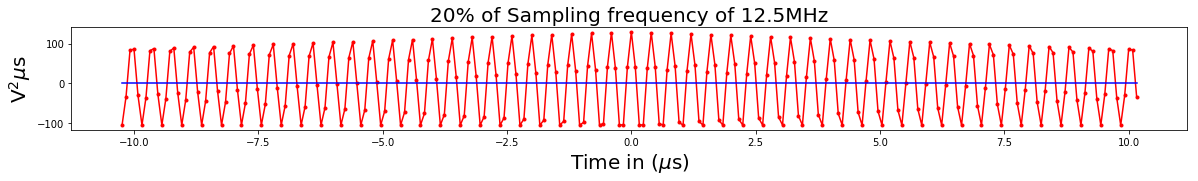

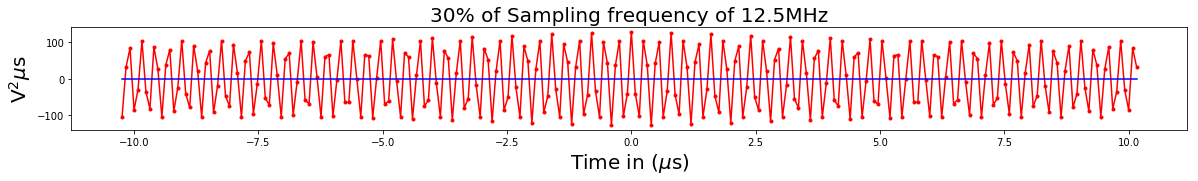

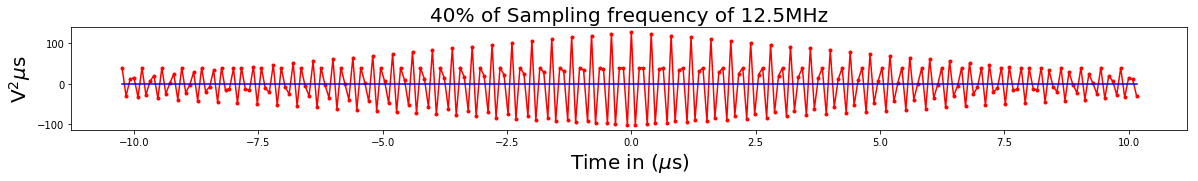

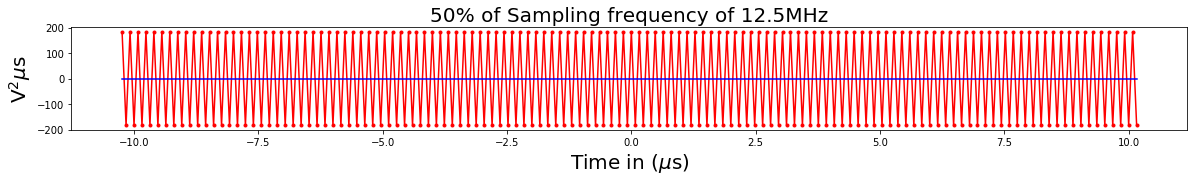

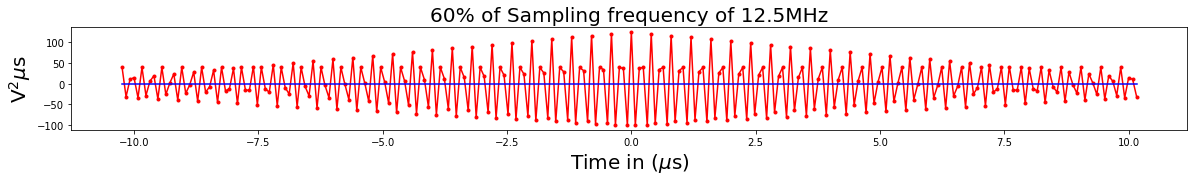

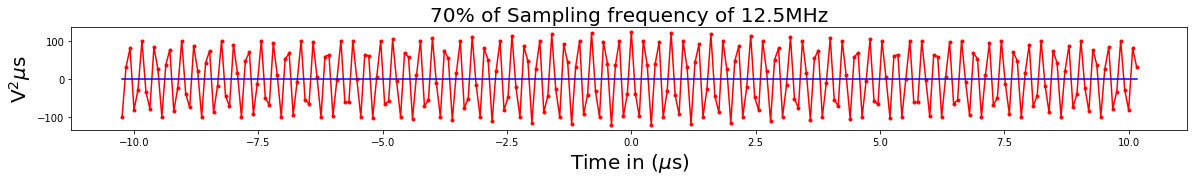

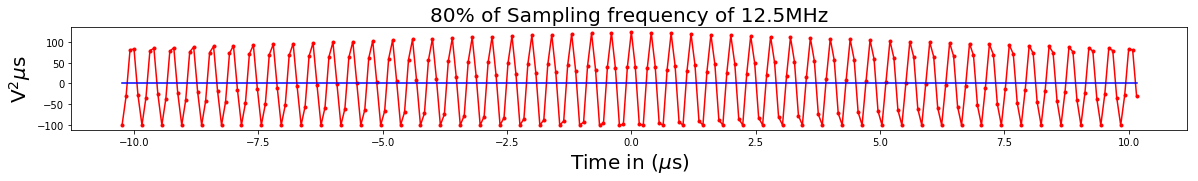

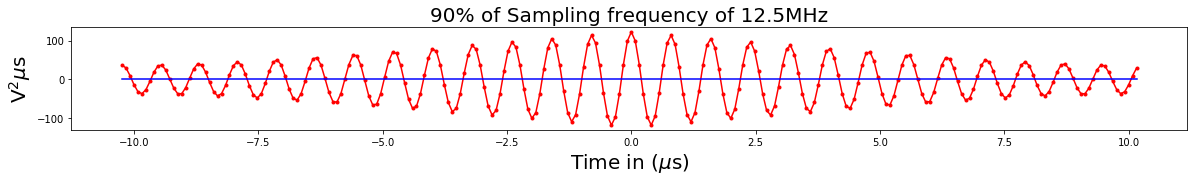

In [128]:
N = 2**8
v_samp = 12.5e6
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
for i in range(1,10):
    FF = idft(power_spectra(N)[i-1],f,t,vsamp=12.5e6)
    REAL = []
    IMAG = []
    for num in FF[1]:
        REAL.append(num.real)
        IMAG.append(num.imag)
    plt.figure(figsize=(20,20))
    lit = 910 + i
    plt.subplot(lit)
    plt.plot(t/1e-6,REAL,'r.-')
    plt.plot(t/1e-6,IMAG,'b')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
    plt.xlabel('Time in ($\mu$s)',fontsize=20)
    plt.ylabel('V$^2$$\mu$s',fontsize = 20)
    plt.show()


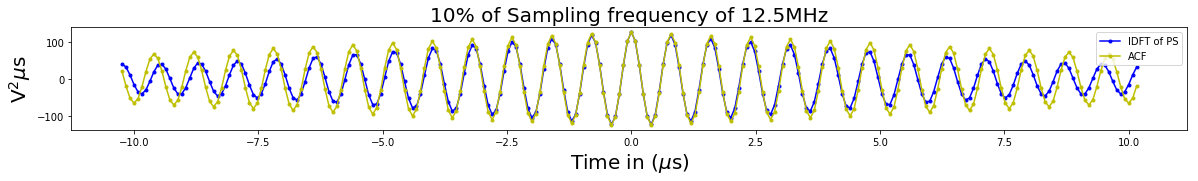

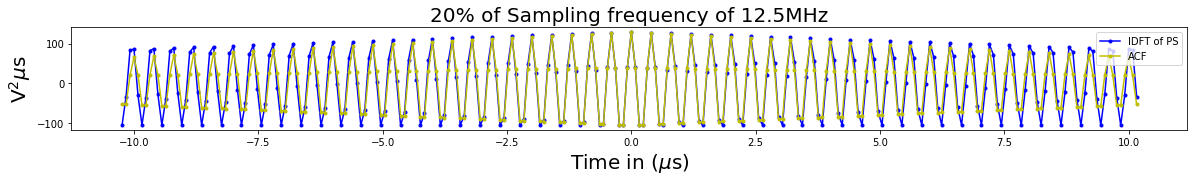

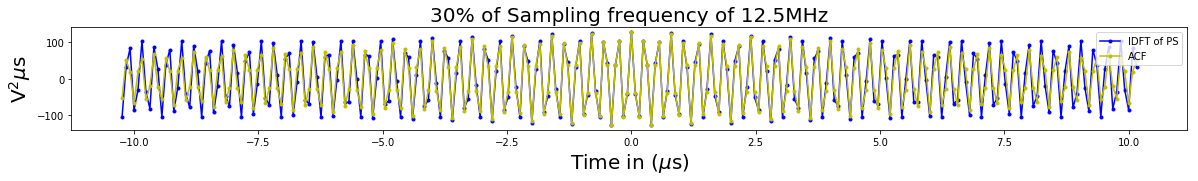

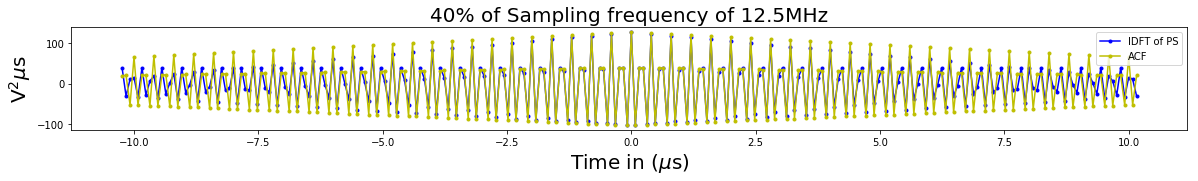

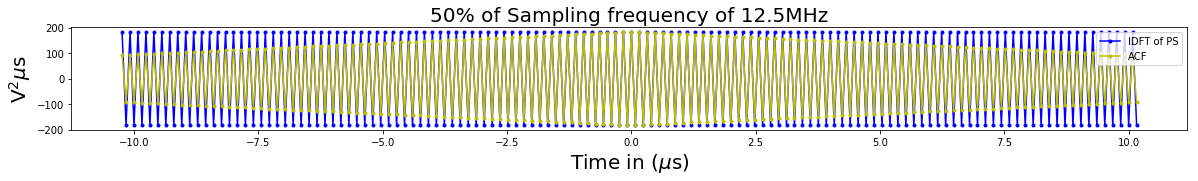

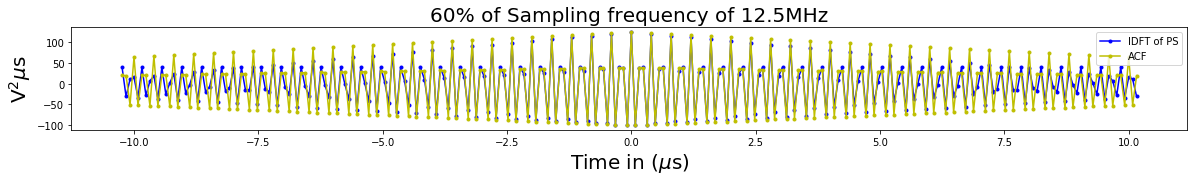

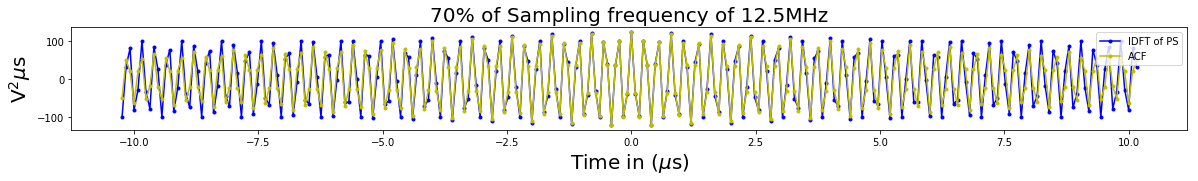

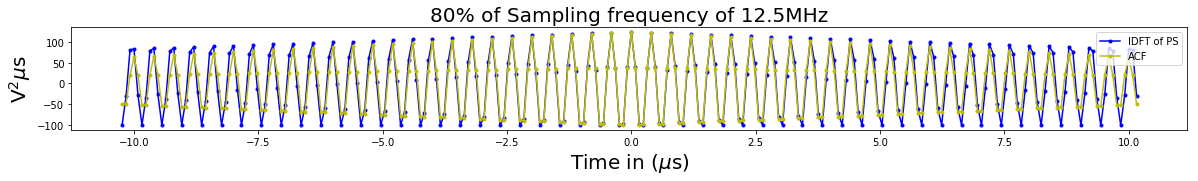

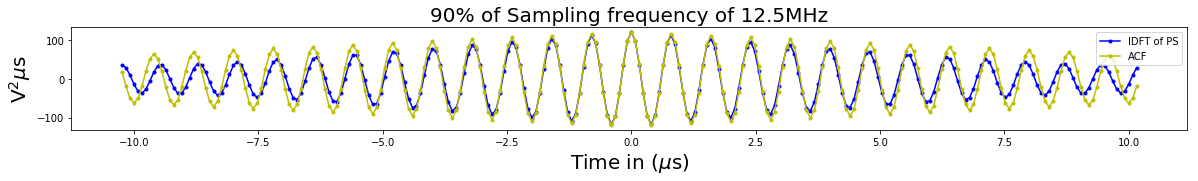

In [130]:
###THIS ILLUSTRATES IDFT(POWER_SPECTRA) == ACF
for i in range(1,10):
    x = ARR[i-1][50:50+N]/2**13
    ACF = np.correlate(x,x,'same')

    GG = idft(power_spectra(N)[i-1],f,t)
    yee = 910 +i 
    
     



    plt.figure(figsize=(20,20))
    plt.subplot(yee)
    plt.plot(t/1e-6,GG[1].real,'b.-')
    plt.plot(t/1e-6,ACF,'y.-')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
    plt.xlabel('Time in ($\mu$s)',fontsize =20)
    plt.ylabel('V$^2$$\mu$s',fontsize=20)
    plt.legend(['IDFT of PS','ACF'],loc = 'upper right')
    plt.show()

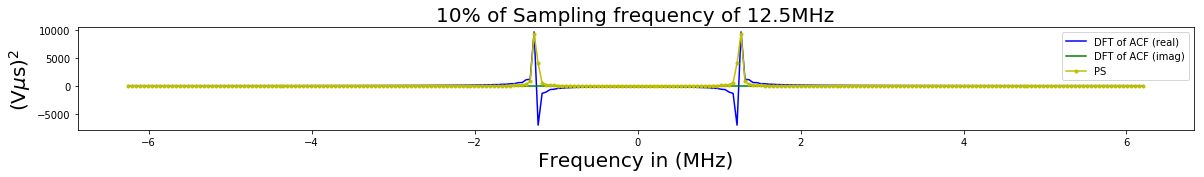

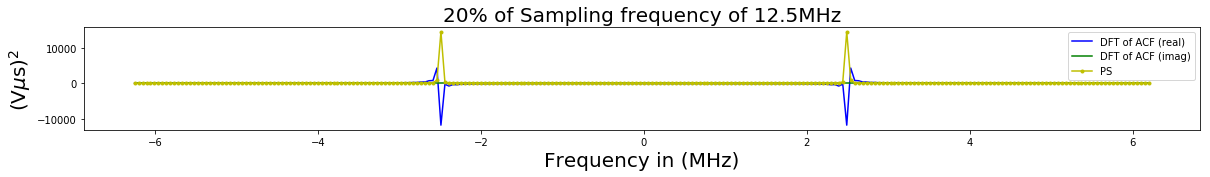

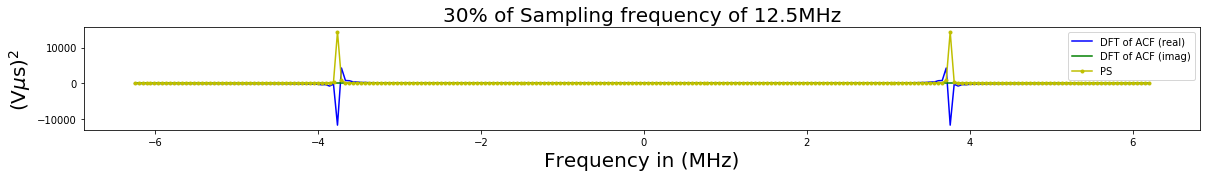

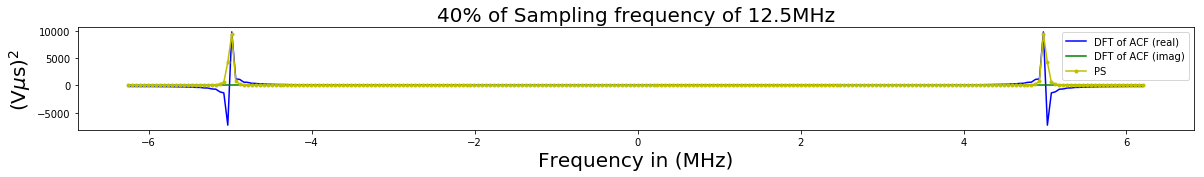

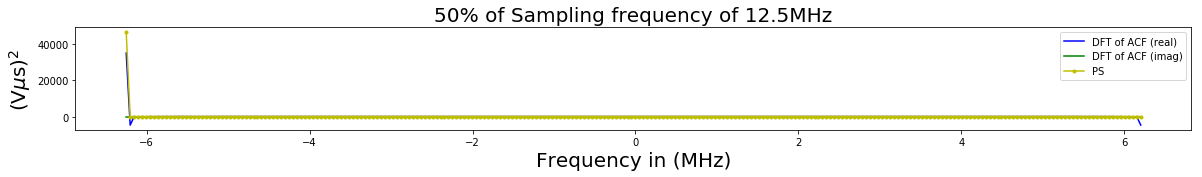

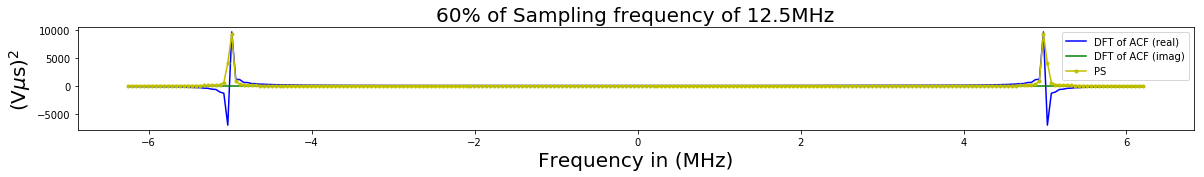

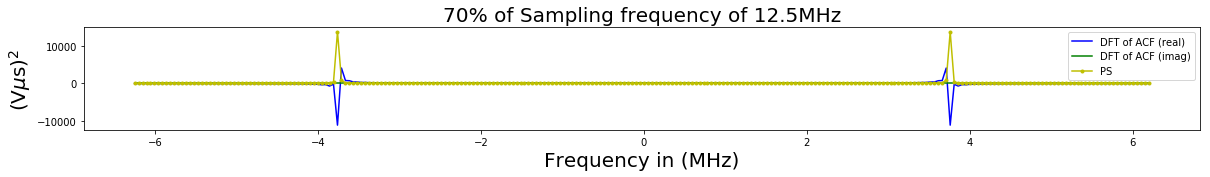

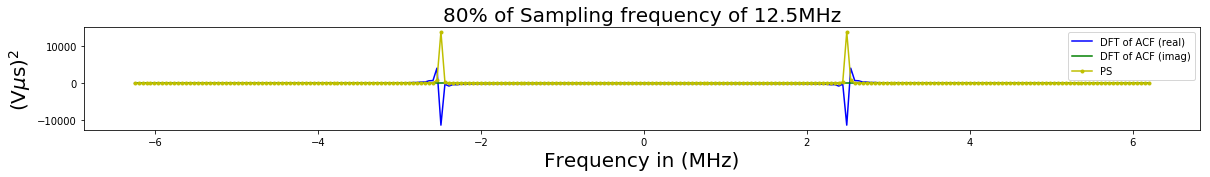

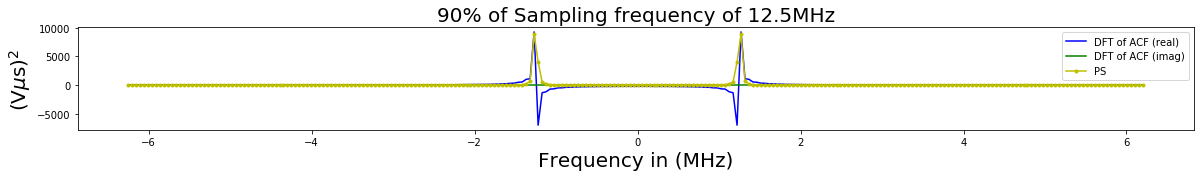

In [131]:
###THIS ILLUSTRATES POWER_SPECTRA == DFT(ACF)
for i in range(1,10):
    x = ARR[i-1][50:50+N]/2**13
    ACF = np.correlate(x,x,'same')

    GG = dft(ACF,t,f)
    yee = 910 +i 



    plt.figure(figsize=(20,20))
    plt.subplot(yee)
    plt.plot(f/1e6,GG[1].real,'b')
    plt.plot(f/1e6,GG[1].imag,'g')

    plt.plot(f/1e6,power_spectra(N)[i-1],'y.-')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize = 20)
    plt.xlabel('Frequency in (MHz)',fontsize = 20)
    plt.ylabel('(V$\mu$s)$^2$',fontsize = 20)
    plt.legend(['DFT of ACF (real)','DFT of ACF (imag)','PS'],loc = 'upper right')
    plt.show()

In [28]:
##FTs pf NOISE

In [132]:
Arr = np.load('arr_0.npy')
arr = np.load('arr_1.npy')

In [133]:
###1

import matplotlib.pyplot as plt
import numpy as np
Arr = Arr/2**13
Vmean = np.mean(Arr)
print(Vmean)
Vmeansqr = np.mean([i**2 for i in Arr])
print(Vmeansqr)
Vrms = np.sqrt(Vmeansqr)
print(Vrms)



print(min(Arr))

0.03725
0.1003828125
0.31683246756
-1.3125


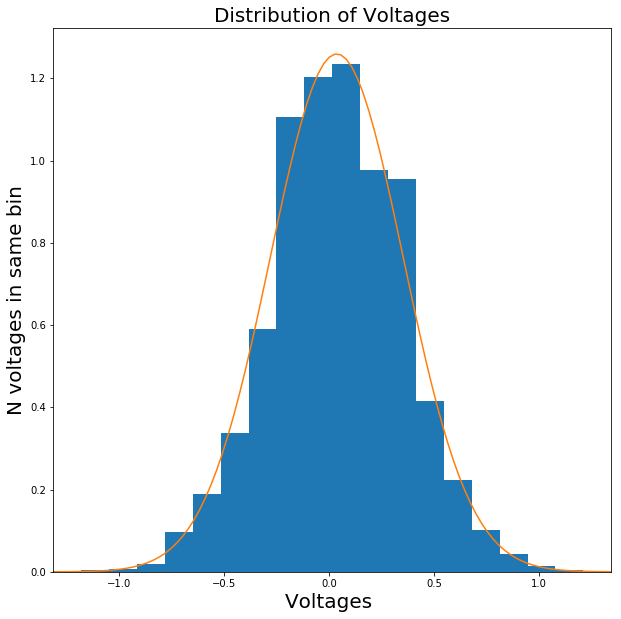

In [135]:
###2
from matplotlib.pyplot import mlab
import scipy as sp 
from scipy import stats 
from scipy.stats import norm



plt.figure(figsize=(10,10))
plt.hist(Arr,bins=20,normed=True)
plt.xlim((min(Arr), max(Arr)))


x = np.linspace(min(Arr),max(Arr),100)
plt.plot(x,mlab.normpdf(x,Vmean,Vrms))
plt.title('Distribution of Voltages',fontsize = 20)
plt.xlabel('Voltages ',fontsize = 20)
plt.ylabel('N voltages in same bin',fontsize = 20)
plt.show()


In [136]:
###3
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(arr[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    if n > 33:
        print("not a valid input")
    return np.array(PF)


In [137]:
def get_PS_plots_block(n):
    v_samp = 12.5e6
    N = 16000
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    GG = [np.mean(i) for i in zip(*power_spectra_block(n))]

    plt.figure(figsize=(10,10))
       
    plt.plot(f/1e6,GG)
    plt.xlabel("Frequency in (MHz)", fontsize= 20)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 20)
    plt.title('Average Power Spectra  of ' + str(n-1) + ' Blocks',fontsize = 20)
    plt.show()
    

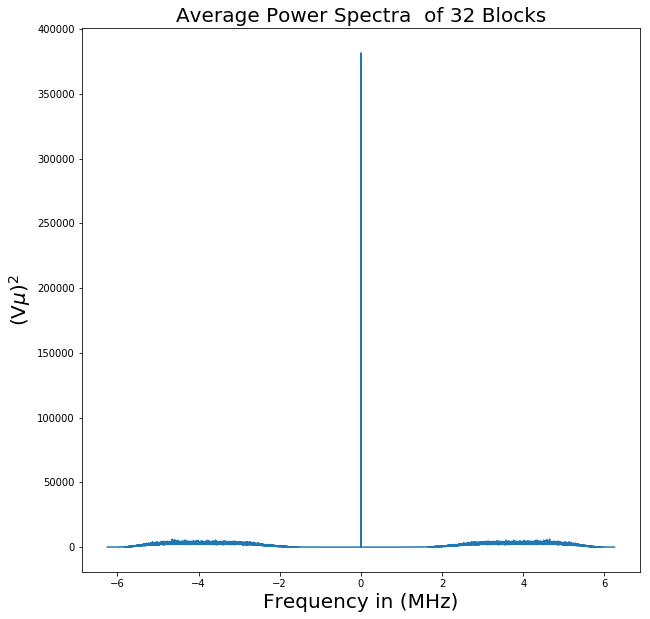

In [138]:
get_PS_plots_block(33)

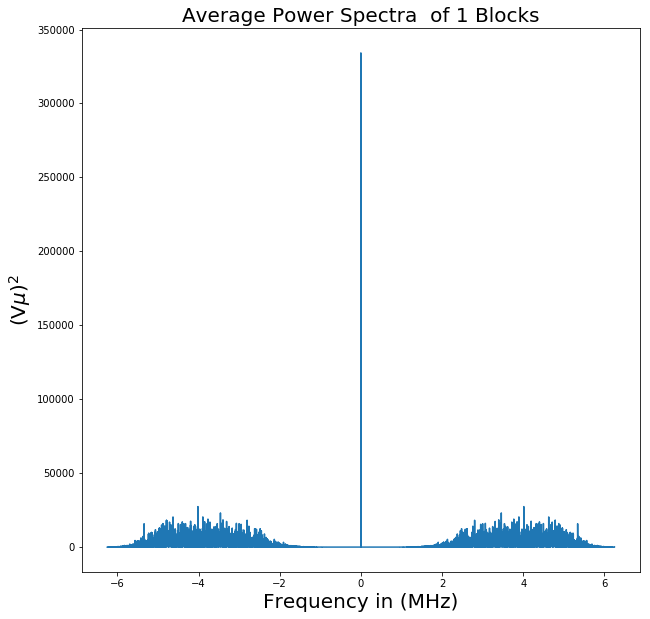

In [139]:
get_PS_plots_block(2)

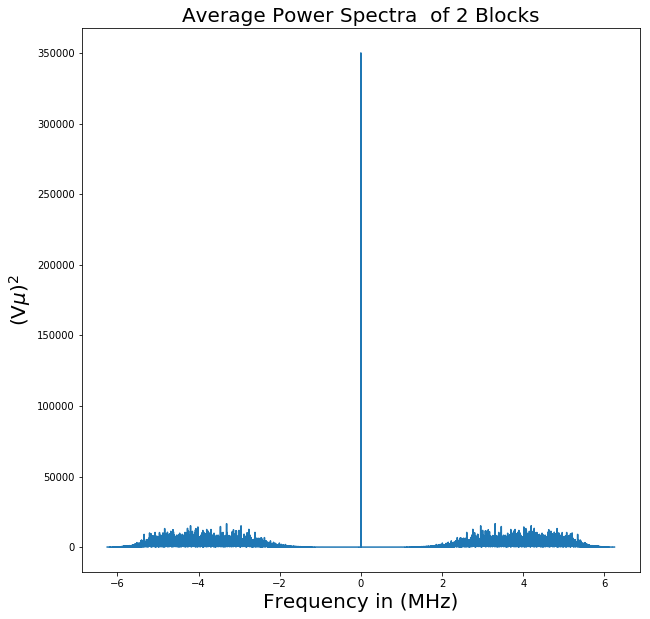

In [140]:
get_PS_plots_block(3)

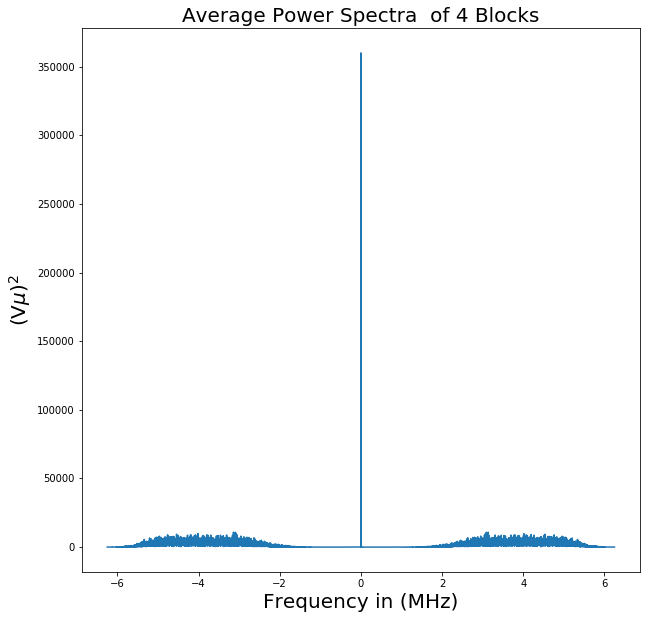

In [141]:
get_PS_plots_block(5)

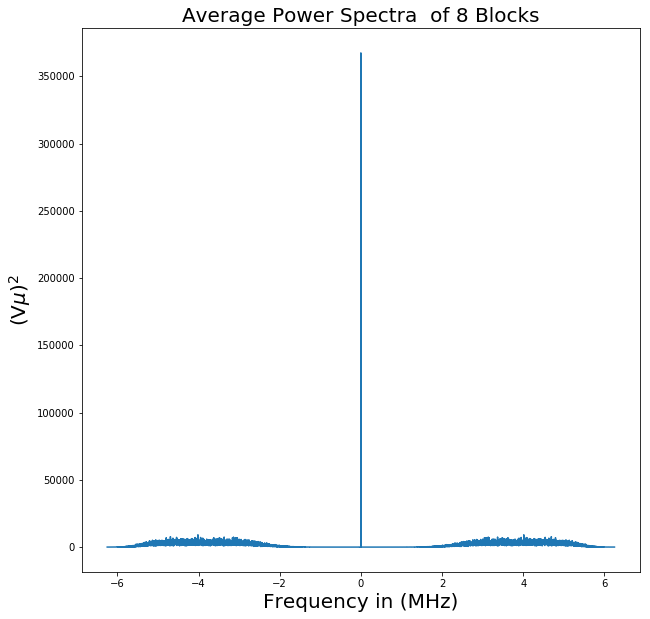

In [142]:
get_PS_plots_block(9)

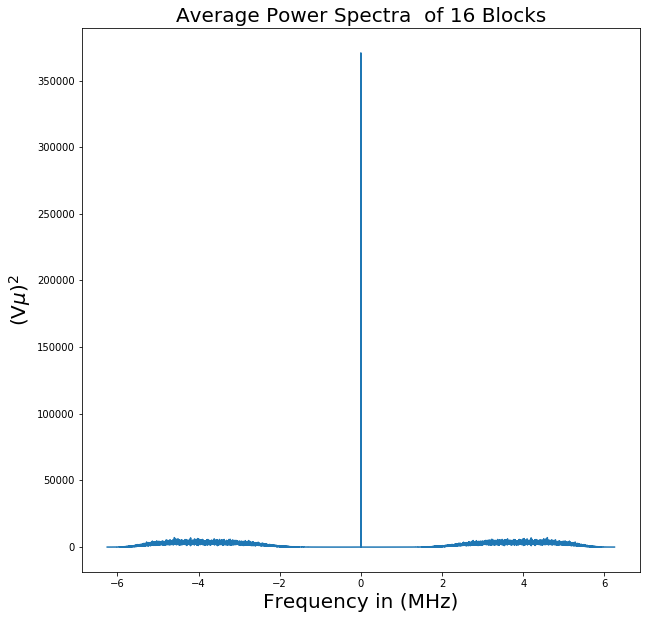

In [143]:
get_PS_plots_block(17)

In [144]:
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(arr[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    
    return np.array(PF)

In [145]:
N = 16000
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 


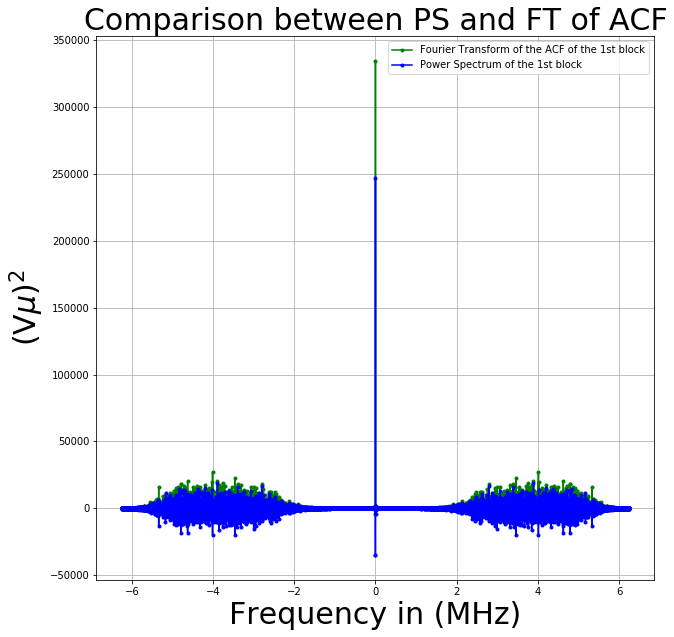

In [148]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = arr[0]/2**13
acf = np.correlate(x, x, mode='same')
yee = dft(acf,t,f)
# plot ACF
fig = plt.figure(figsize = (10, 10))

plt.plot(f/1e6,power_spectra_block(2)[0],'g.-')

plt.plot(f/1e6,yee[1].real,'b.-')
plt.xlabel('Frequency in (MHz)',fontsize = 30)
plt.ylabel('(V$\mu$)$^2$',fontsize=30)
plt.legend(['Fourier Transform of the ACF of the 1st block','Power Spectrum of the 1st block'],loc='upper right',fontsize=10)
plt.title('Comparison between PS and FT of ACF',fontsize=30)
plt.grid()


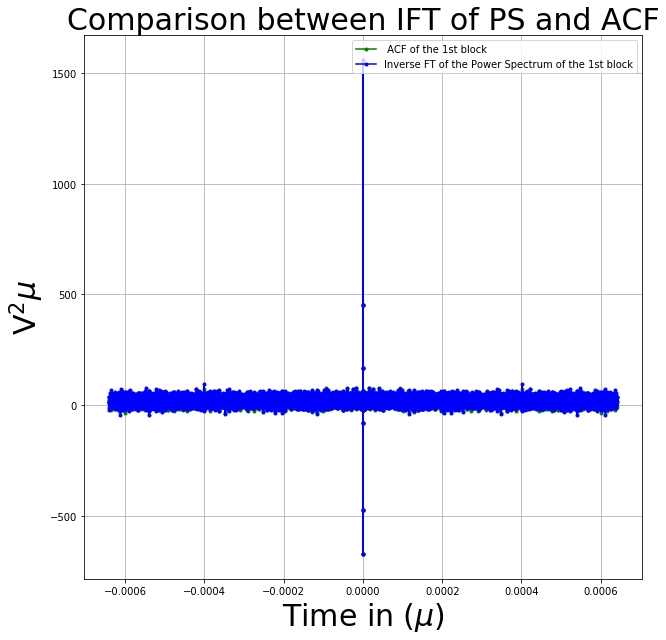

In [149]:
x = arr[0]/2**13
acf = np.correlate(x, x, mode='same')
yee = idft(power_spectra_block(2)[0],f,t)
# plot ACF
fig = plt.figure(figsize = (10, 10))

#plt.stem(kappa, acf)
plt.plot(t,acf,'g.-')

plt.plot(t,yee[1].real,'b.-')
plt.xlabel('Time in ($\mu$)',fontsize = 30)
plt.ylabel('V$^2$$\mu$',fontsize=30)
plt.legend([' ACF of the 1st block','Inverse FT of the Power Spectrum of the 1st block'],loc='upper right',fontsize=10)
plt.title('Comparison between IFT of PS and ACF',fontsize=30)
plt.grid()

##5.1

In [156]:
data_105 = np.genfromtxt('5_1_10_5.txt')/(2.**15)
data_95 = np.genfromtxt('5_1_9_5.txt')/(2.**15)



In [157]:
def power_spectra(signal,v_samp,N):
    PF = []
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,10):
        pf = []
        EF = dft(signal[0:N],t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    return PF

In [152]:
def get_PS_plots(signal,v_samp,N):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(20,20))
    plt.subplot(411)
    plt.plot(f,power_spectra(signal,v_samp,N)[1],'b.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 30)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 30)
    plt.title("Power Spectra",fontsize = 30)
    plt.show()
    

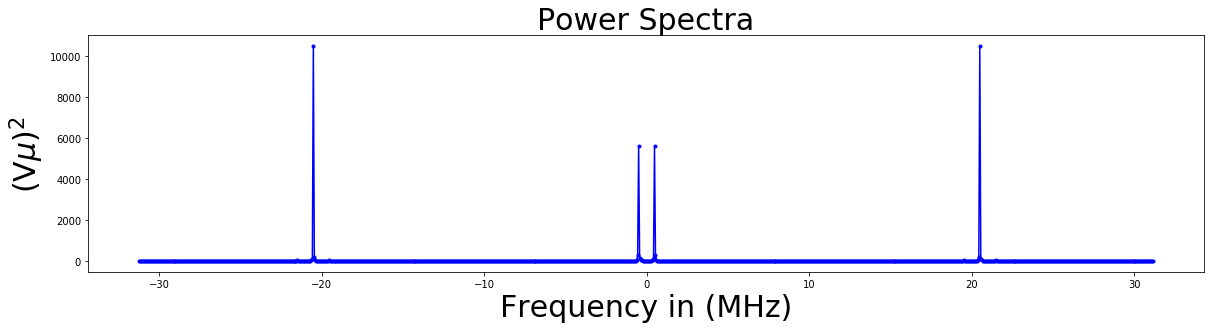

In [153]:
get_PS_plots( data_105, 62.5,2**10)

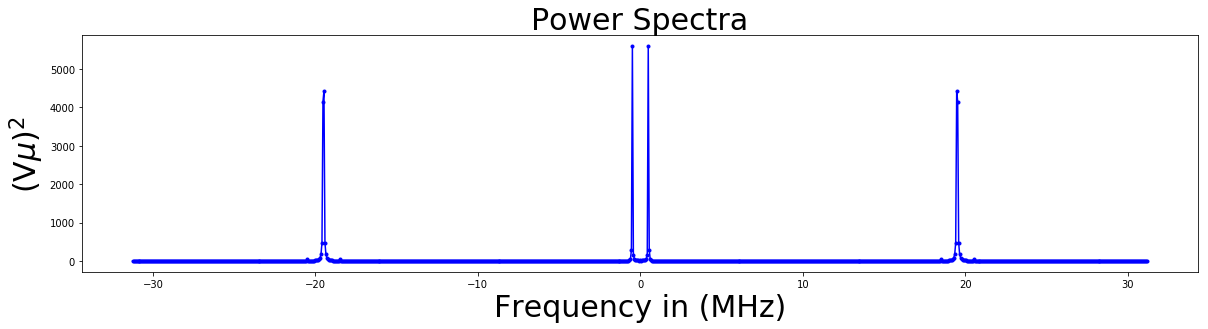

In [155]:
get_PS_plots(data_95,62.5,2**10)

In [158]:
def get_plot_signals(signal,v_samp,N):
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) 
    plt.figure(figsize=(30,130))
    plt.subplot(911)
    plt.plot(t,signal[100:N+100],'b.-')
    plt.title('Signal at v_sig',fontsize=30)
    plt.xlabel('Time in $\mu$s',fontsize=30)
    plt.ylabel('Voltage (V)',fontsize=30)
    plt.show()

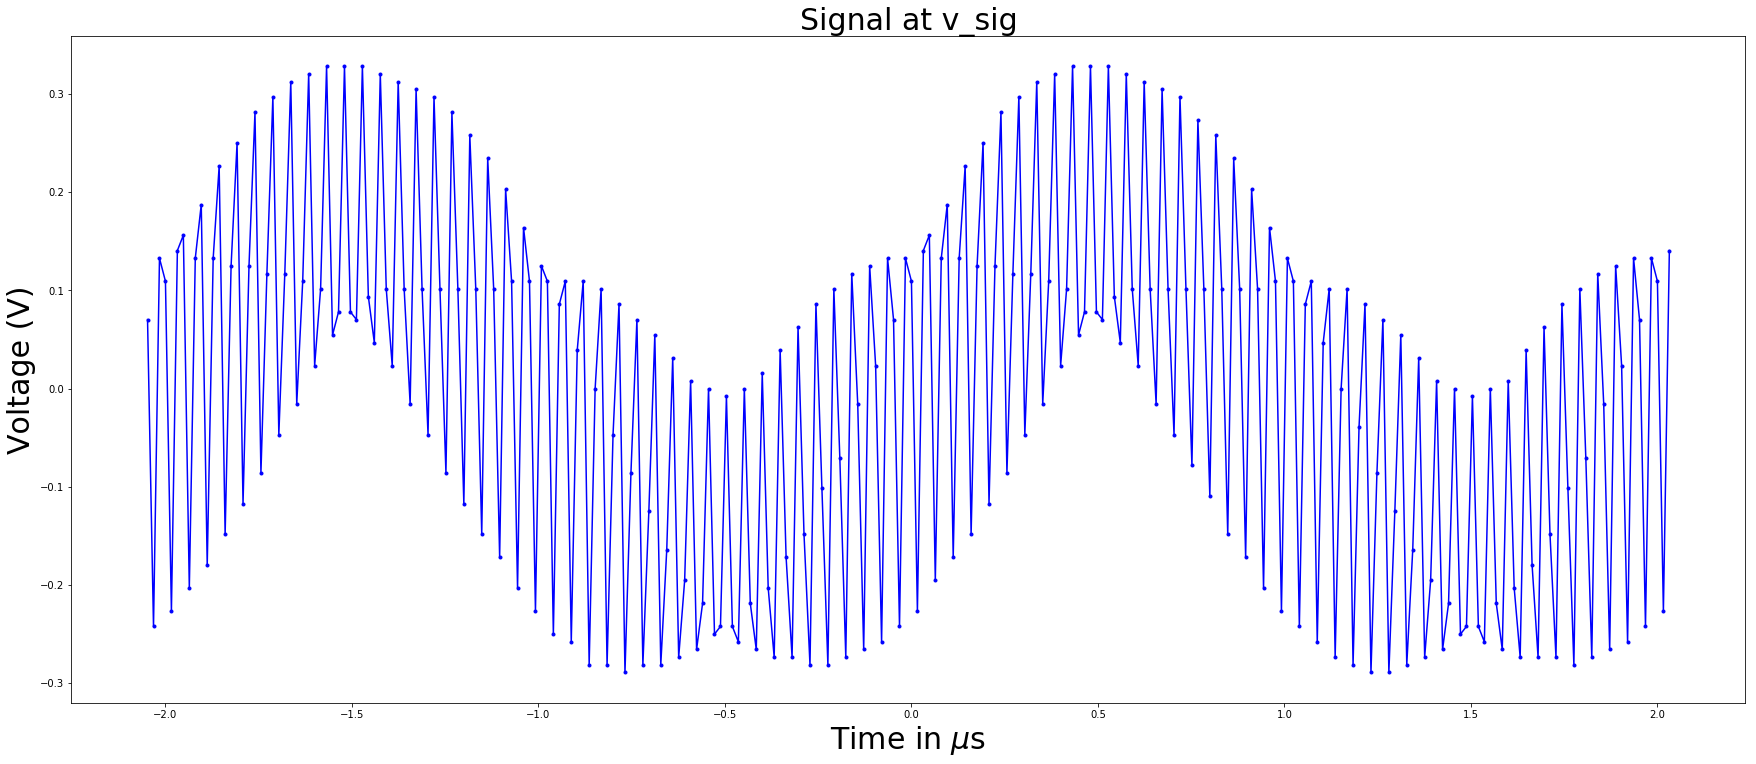

In [159]:
get_plot_signals(data_105,62.5,2**8)

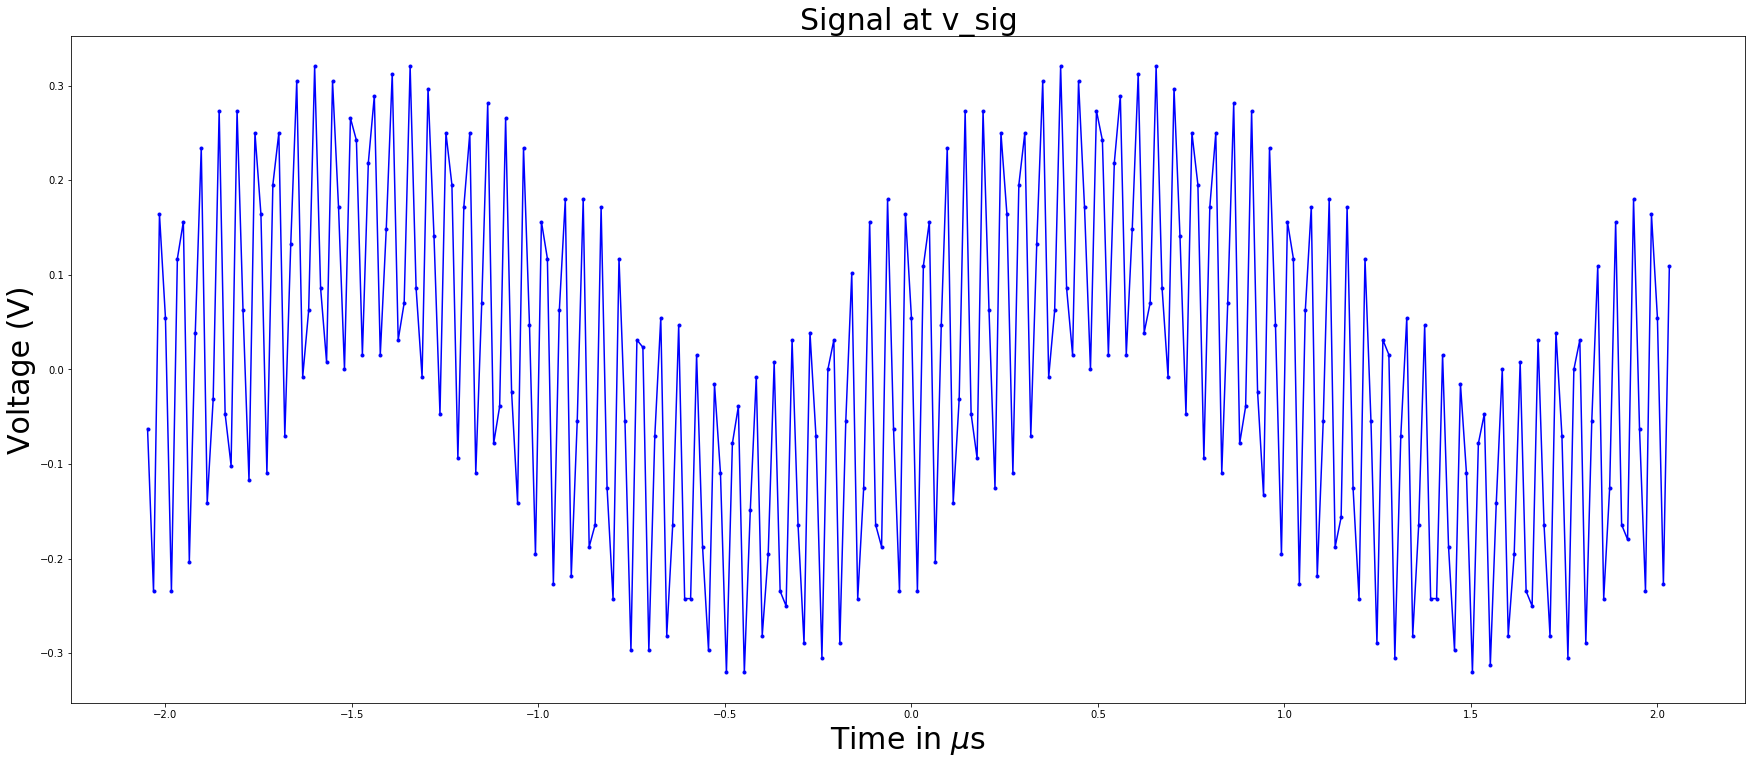

In [160]:
get_plot_signals(data_95,62.5,2**8)

In [161]:
def voltage_spectrum(signal,v_samp, N):
   
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 

    F = dft(signal[100:N+100],t,f,vsamp=62.5)
        
    return F[0], F[1]

In [162]:
def get_plot_VS(signal,v_samp,N):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(30,30))
    plt.subplot(411)
    plt.plot(voltage_spectrum(signal,v_samp, N)[0],voltage_spectrum(signal,v_samp,N)[1].real,'r.-')
    plt.plot(voltage_spectrum(signal,v_samp, N)[0],voltage_spectrum(signal,v_samp,N)[1].imag,'b.-')
    plt.title("Voltage Spectrum for v_sig",fontsize=30)
    plt.xlabel("Frequency in (MHz)",fontsize=30)
    plt.ylabel("V$\mu$s",fontsize=30)
    plt.show()

    

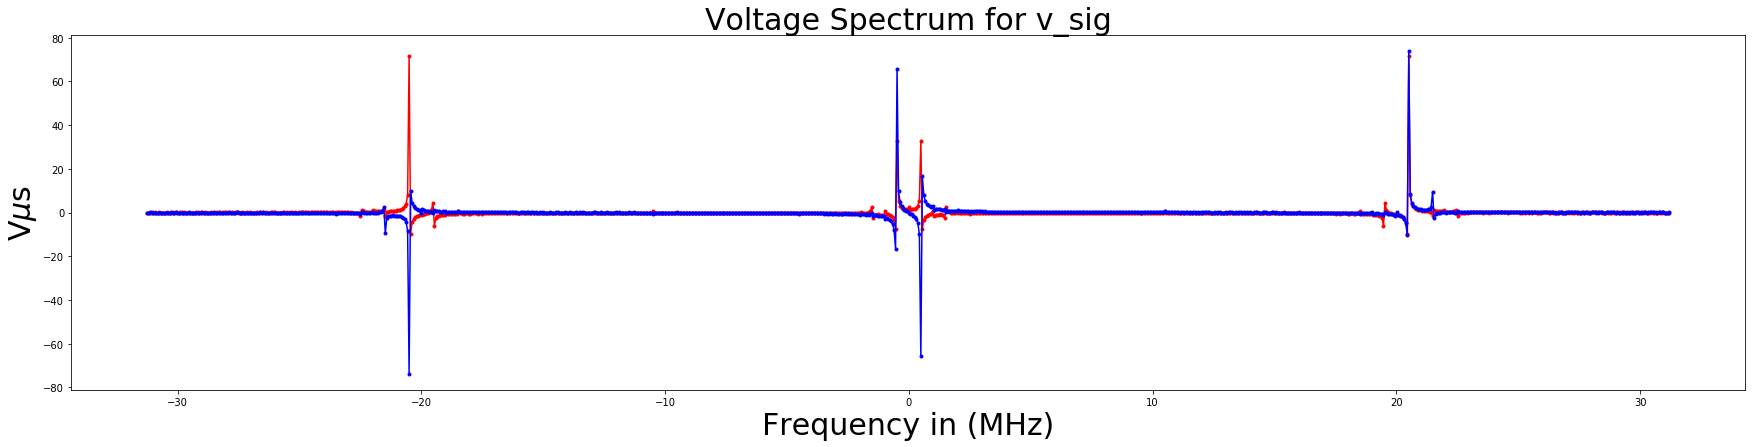

In [163]:
get_plot_VS(data_105,62.5,2**10)

In [164]:
N=2**10
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)



In [168]:
import numpy as np


W = voltage_spectrum(data_105,62.5,N)[0]
f_signal =  voltage_spectrum(data_105,62.5,N)[1]

#Cutting out the sums 
cut_f_signal = f_signal.copy()
cut_f_signal[(np.abs(W)>10)] = 0

cut_signal = idft(cut_f_signal,f,t)


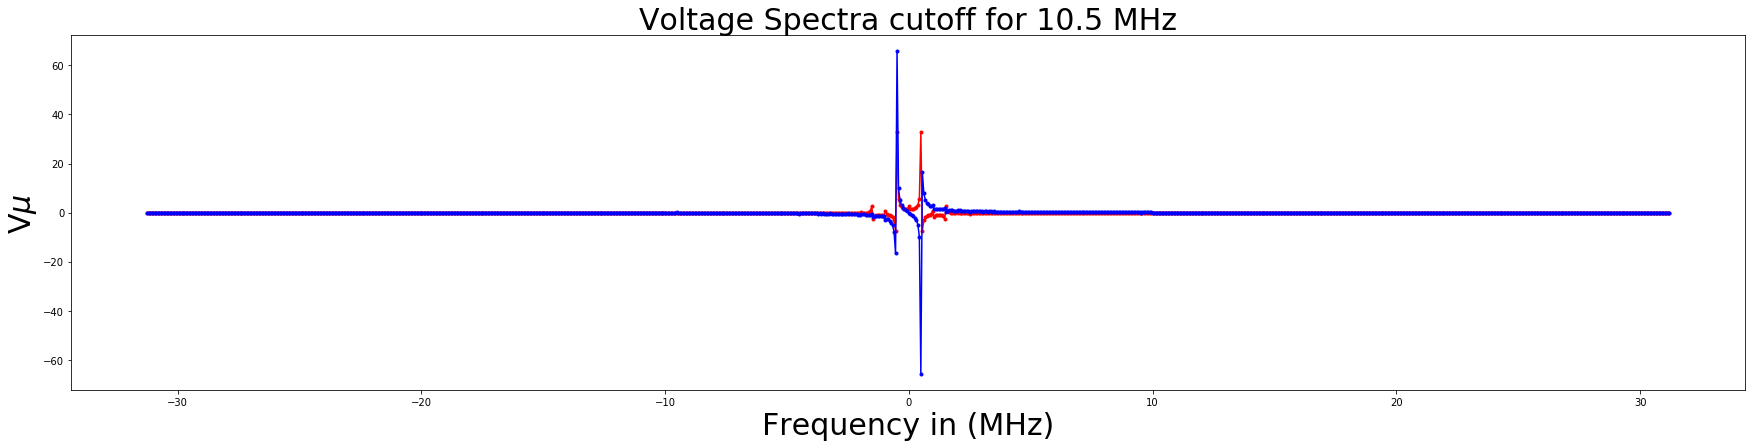

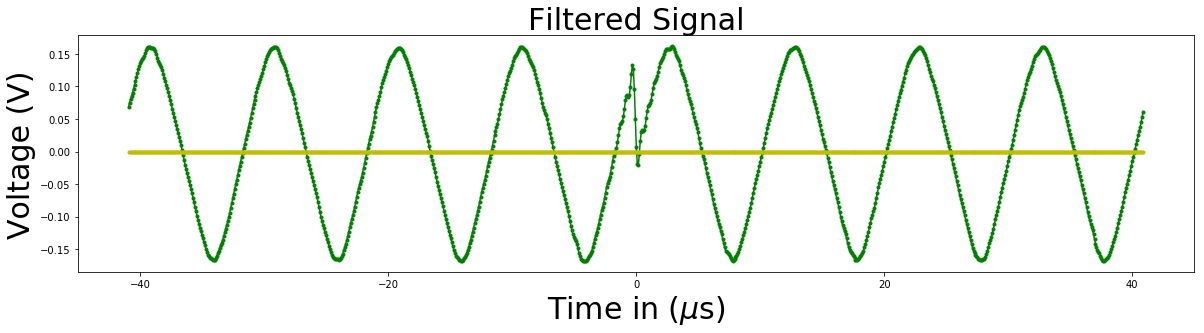

In [174]:
####plotting cutoff of voltage spectrum for 10.5 MHz
plt.figure(figsize=(30,30))
plt.subplot(411)
plt.plot(W,cut_f_signal.real,'r.-')
plt.plot(W,cut_f_signal.imag,'b.-')
plt.title('Voltage Spectra cutoff for 10.5 MHz',fontsize = 30)
plt.xlabel('Frequency in (MHz)',fontsize = 30)
plt.ylabel('V$\mu$',fontsize = 30)

####Plotting Filtered Signal 
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(t/1e-6,cut_signal[1].real,'g.-')
plt.plot(t/1e-6,cut_signal[1].imag,'y.-')
plt.title('Filtered Signal',fontsize = 30)
plt.xlabel('Time in ($\mu$s)', fontsize = 30)
plt.ylabel('Voltage (V)',fontsize = 30)
plt.show()

In [ ]:
####5.2

In [175]:
def get_PS_plots_zoom(signal,v_samp,N):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(30,30))
    plt.subplot(411)
    plt.plot(f,power_spectra(signal,v_samp,N)[1],'b.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 30)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 30)
    plt.title("Zoom in Power Spectra",fontsize = 30)
    plt.ylim(0,30)
    plt.xlim(-2.5,2.5)
    plt.show()

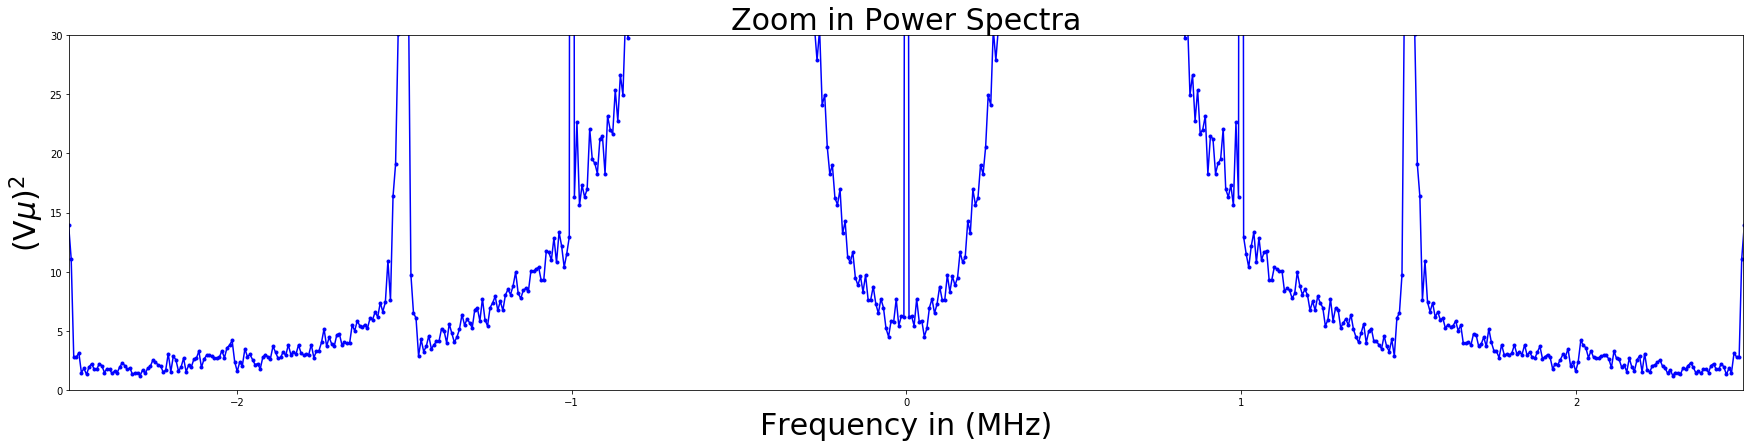

In [176]:
get_PS_plots_zoom(data_105,62.5,2**13)

In [177]:
####5.3

In [178]:
data_yit = np.genfromtxt('5_3_phase0_10_5.txt')/(2.**15)
data_yee = np.genfromtxt('5_3_phase0_9_5.txt')/(2.**15)
data_gig = np.genfromtxt('5_3_phase90_10_5.txt')/(2.**15)
data_lit = np.genfromtxt('5_3_phase90_10_5.txt')/(2.**15)


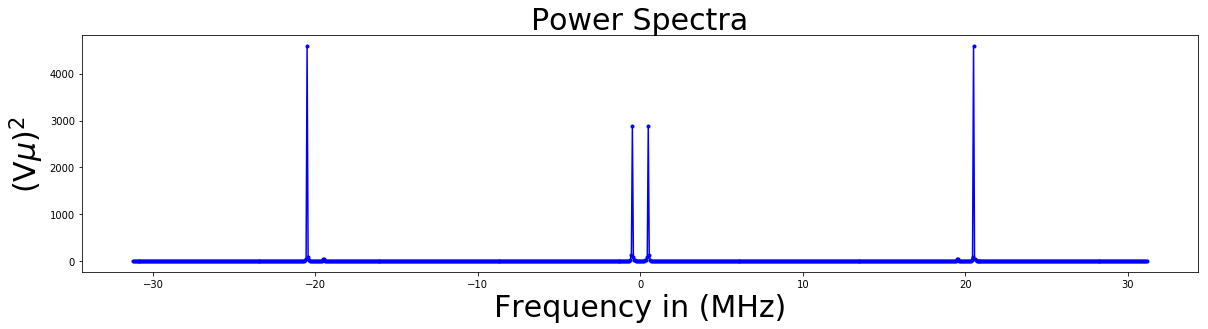

In [179]:
get_PS_plots(data_yit,62.5,2**10)

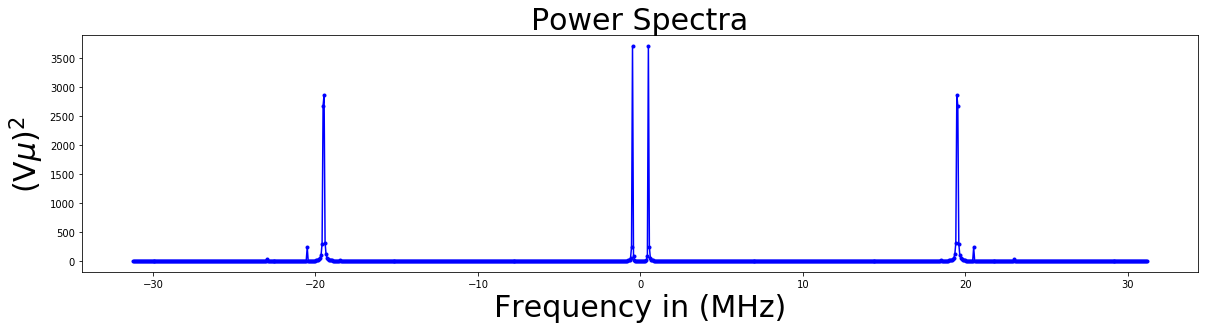

In [180]:
get_PS_plots(data_yee,62.5,2**10)

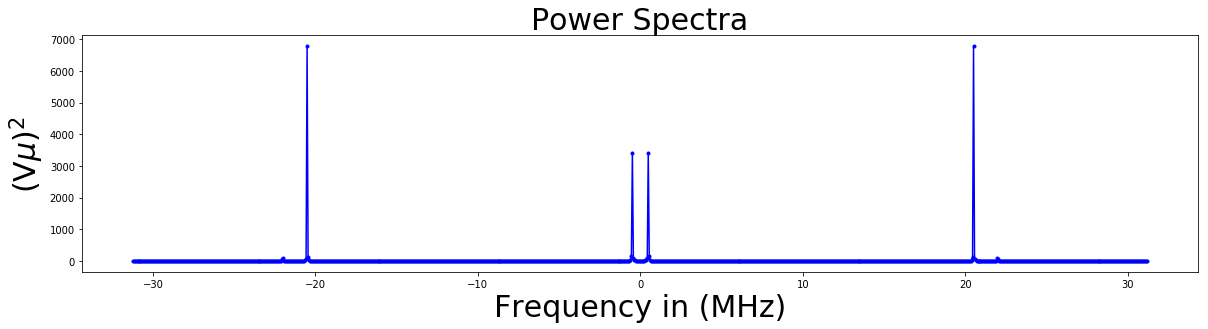

In [181]:
get_PS_plots(data_gig,62.5,2**10)

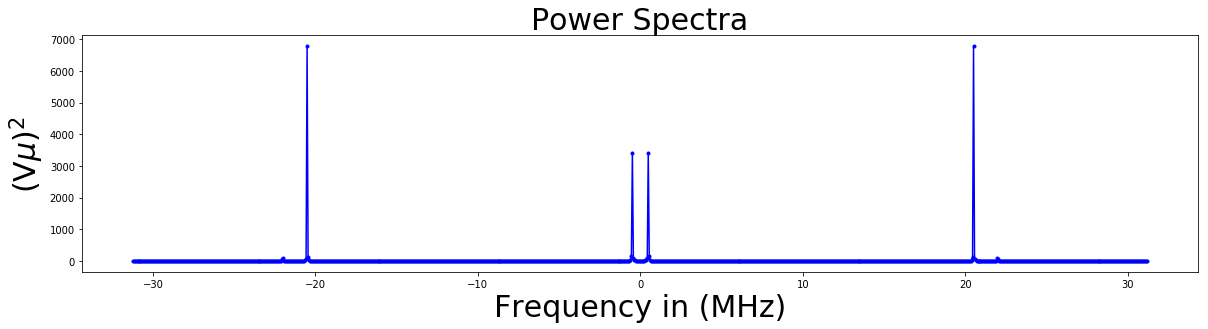

In [182]:
get_PS_plots(data_lit,62.5,2**10)